#Introduction


# Analyse des Influenceurs des Médias Sociaux

Ce projet a pour objectif d'analyser les données des influenceurs sur Instagram, TikTok et YouTube afin de comprendre leurs caractéristiques, leurs performances et les tendances actuelles.

## Tâches Globales Effectuées

1.  **Collecte et Fusion des Données**:
    *   Téléchargement des datasets des influenceurs Instagram, TikTok et YouTube depuis Kaggle.
    *   Fusion de multiples fichiers CSV pour chaque plateforme en un seul DataFrame combiné (e.g., `df_combined`, `dt_combined`, `dy_combined`).

2.  **Nettoyage et Préparation des Données**:
    *   Uniformisation des noms de colonnes à travers les différents datasets pour faciliter la fusion.
    *   Identification et suppression des doublons basés sur les noms d'influenceurs et de canaux.
    *   Conversion des types de données pour les colonnes numériques (followers, engagement, vues, likes, commentaires) qui étaient initialement des objets (chaînes de caractères avec 'M' ou 'K').
    *   Gestion des valeurs manquantes dans les colonnes numériques (`Engagement_avg`, `Comments avg.`, `Avg. likes`, `Avg. comments`) en utilisant des modèles de régression aléatoire (RandomForestRegressor) pour prédire les valeurs basées sur d'autres caractéristiques pertinentes.
    *   Remplissage des valeurs manquantes pour les catégories et pays en utilisant des données factices aléatoires pour assurer la complétude des datasets.
    *   Suppression des colonnes non pertinentes (`S.no`, `Rank`, `row-cell`).

3.  **Analyse Exploratoire des Données (EDA)**:
    *   Visualisation des distributions des followers pour chaque plateforme (Instagram, YouTube, TikTok).
    *   Calcul et analyse des corrélations entre les followers, l'engagement moyen, l'engagement authentique et les commentaires moyens.
    *   Examen de la répartition des influenceurs par catégorie et sous-catégorie.

4.  **Évaluation de l'Influence et de l'Efficacité**:
    *   Calcul de métriques clés : taux d'engagement (`Engagement_Rate`), taux d'engagement authentique (`Authentic_Engagement_Rate`), et taux de commentaires (`Comments_Rate`).
    *   Définition d'un **Score d'Influence** composite pour évaluer l'efficacité globale des influenceurs.
    *   Estimation du prix potentiel d'une story (`Story_Price`) basé sur les followers et l'engagement.
    *   Identification des top influenceurs selon divers critères (taux d'engagement, engagement authentique, score d'influence, et rapport coût-efficacité).

## Techniques Utilisées

*   **Manipulation de Données**: `pandas` pour le chargement, la fusion, le nettoyage, le renommage de colonnes, la suppression de doublons, la conversion de types et la création de nouvelles colonnes.
*   **Traitement des Valeurs Manquantes**: `sklearn.impute.SimpleImputer` pour les valeurs numériques simples et `sklearn.ensemble.RandomForestRegressor` pour une imputation plus sophistiquée des valeurs d'engagement et de commentaires.
*   **Encodage des Variables Catégorielles**: `sklearn.preprocessing.LabelEncoder` pour transformer les catégories en format numérique utilisable par les modèles d'apprentissage automatique.
*   **Visualisation de Données**: `matplotlib.pyplot` et `seaborn` pour générer des histogrammes, des scatter plots, des box plots, des heatmaps et des barplots afin de comprendre les distributions et les corrélations. `plotly.express` pour les graphiques interactifs comme le Sunburst.
*   **Modélisation Prédictive Simple**: `sklearn.model_selection.train_test_split` pour la préparation des données d'entraînement et de test pour l'imputation, et `RandomForestRegressor` pour prédire les valeurs manquantes.


Ce projet vise à analyser les données des influenceurs des médias sociaux (Instagram, TikTok, YouTube) pour comprendre leurs caractéristiques, leurs performances et leurs tendances. Les objectifs incluent :

*  La fusion et le nettoyage des datasets.

*  L'analyse des followers, de l'engagement et des catégories d'influenceurs.

*  La visualisation des résultats pour identifier des insights clés.

Les données proviennent de Kaggle (Top 1000 Social Media Channels) et comprennent plusieurs fichiers CSV pour différentes plateformes et périodes.


#Installation des dépendances et téléchargement des données



In [ ]:
# Installer l'API Kaggle
!pip install kaggle

# Importer le fichier kaggle.json
from google.colab import files
files.upload()  # Télécharge ton fichier kaggle.json

# Déplacer le fichier kaggle.json au bon endroit
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Télécharger le dataset
!kaggle datasets download -d ramjasmaurya/top-1000-social-media-channels

# Décompresser le fichier
!unzip top-1000-social-media-channels.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ramjasmaurya/top-1000-social-media-channels
License(s): CC0-1.0
Archive:  top-1000-social-media-channels.zip
  inflating: social media influencers - Tiktok sep 2022.csv  
  inflating: social media influencers - Youtube sep-2022.csv  
  inflating: social media influencers - instagram sep-2022.csv  
  inflating: social media influencers - instagram.csv  
  inflating: social media influencers - tiktok.csv  
  inflating: social media influencers - youtube.csv  
  inflating: social media influencers-INSTAGRAM - -DEC 2022.csv  
  inflating: social media influencers-TIKTOK - ---DEC 2022.csv  
  inflating: social media influencers-YOUTUBE - --DEC 2022.csv  
  inflating: social media influencers-instagram - -nov 2022.csv  
  inflating: social media influencers-instagram june 2022 - june 2022.csv  
  inflating: social media influencers-tiktok - ---nov 2022.csv  
  inflating: social media influencers-tiktok june 2022 -

#Chargement et préparation des données



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les datasets instagram
df1 = pd.read_csv("social media influencers - instagram.csv")
df2 = pd.read_csv("social media influencers-instagram june 2022 - june 2022.csv")
df3 = pd.read_csv("social media influencers-INSTAGRAM - -DEC 2022.csv")
df4 = pd.read_csv("social media influencers - instagram sep-2022.csv")
df5 = pd.read_csv("social media influencers-instagram - -nov 2022.csv")

# Uniformiser les colonnes de df1
df1 = df1.rename(columns={
    'Influencer insta name': 'Influencer_name',
    'instagram name': 'Instagram_name',
    'category_1': 'Category_1',
    'category_2': 'Category_2',
    'Followers': 'Followers',
    'Audience country(mostly)': 'Country',
    'Authentic engagement\r\n': 'Authentic_engagement',
    'Engagement avg\r\n': 'Engagement_avg'
})

# Uniformiser les colonnes de df2
df2 = df2.rename(columns={
    'instagram name': 'Instagram_name',
    'influencer name ': 'Influencer_name',
    'Category_1': 'Category_1',
    'Category_2': 'Category_2',
    'Subscribers count': 'Followers',
    'Views avg.': 'Engagement_avg',
    'Likes avg': 'Authentic_engagement'
})

# Uniformiser les colonnes de df3
df3 = df3.rename(columns={
    'name': 'Influencer_name',
    'instagram name': 'Instagram_name',
    'Category_1': 'Category_1',
    'Category_2': 'Category_2',
    'followers': 'Followers',
    'country': 'Country',
    'Eng. (Auth.)': 'Authentic_engagement',
    'Eng. (Avg.)': 'Engagement_avg'
})

# Uniformiser les colonnes de df4
df4 = df4.rename(columns={
    'Instagram name': 'Instagram_name',
    ' Name': 'Influencer_name',
    'Subscribers': 'Followers',
    'Audience country': 'Country',
    'Authentic engagement\n': 'Authentic_engagement',
    'Engagement average\r\n': 'Engagement_avg',
    'Category_1': 'Category_1',
    'Category_2': 'Category_2'
})

# Uniformiser les colonnes de df5
df5 = df5.rename(columns={
    'Name': 'Influencer_name',
    'Instagram Name': 'Instagram_name',
    'Category-1': 'Category_1',
    'Followers': 'Followers',
    '\nCountry': 'Country',
    'Eng. (Auth.)': 'Authentic_engagement',
    'Eng. (Avg.)': 'Engagement_avg',
    'Category-2': 'Category_2'
})

# Fusionner tous les datasets
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [ ]:
import pandas as pd
#charger les datasets tiktok et youtube
dt1=pd.read_csv("social media influencers - Tiktok sep 2022.csv")
dt2=pd.read_csv("social media influencers - tiktok.csv")
dt3=pd.read_csv("social media influencers-TIKTOK - ---DEC 2022.csv")
dt4=pd.read_csv("social media influencers-tiktok - ---nov 2022.csv")
dt5=pd.read_csv("social media influencers-tiktok june 2022 - june 2022.csv")
dy1=pd.read_csv("social media influencers - Youtube sep-2022.csv")
dy2=pd.read_csv("social media influencers - youtube.csv")
dy3=pd.read_csv("social media influencers-YOUTUBE - --DEC 2022.csv")
dy4=pd.read_csv("social media influencers-youtube - --nov 2022.csv")
dy5=pd.read_csv("social media influencers-youtube june 2022 - june 2022.csv")

In [ ]:
#tiktok

# Uniformiser les colonnes de dt1
dt1 = dt1.rename(columns={
    'Tiktoker name': 'Tiktoker_name',
    'Tiktok name': 'Tiktok_name',
    'Subscribers': 'Followers',
    'Views avg.': 'Views avg.',
    'Likes avg.': 'Likes avg.',
    'Comments avg.': 'Comments avg.',
    'Shares avg.': 'Shares avg.'
})

# Uniformiser les colonnes de dt2
dt2 = dt2.rename(columns={
    'Tiktoker name': 'Tiktoker_name',
    'Tiktok name': 'Tiktok_name',
    'Subscribers count': 'Followers',
    'Views avg.': 'Views avg.',
    'Likes avg': 'Likes avg.',
    'Comments avg.': 'Comments avg.',
    'Shares avg': 'Shares avg.'
})

# Uniformiser les colonnes de dt3
dt3 = dt3.rename(columns={
    'Tiktoker name': 'Tiktoker_name',
    'Tiktok name': 'Tiktok_name',
    'followers': 'Followers',
    'views(avg)': 'Views avg.',
    'likes(avg.)': 'Likes avg.',
    'comments(avg.)': 'Comments avg.',
    'shares(avg.)': 'Shares avg.'
})

# Uniformiser les colonnes de dt4
dt4 = dt4.rename(columns={
    'Tiktoker name': 'Tiktoker_name',
    'Tiktok name': 'Tiktok_name',
    '\nFollowers': 'Followers',
    'Views (Avg.)': 'Views avg.',
    'Likes (Avg.)': 'Likes avg.',
    'Comments (Avg.)': 'Comments avg.',
    'Shares (Avg.)': 'Shares avg.'
})

# Uniformiser les colonnes de dt5
dt5 = dt5.rename(columns={
    'Tiktoker': 'Tiktoker_name',
    'influencer name': 'Tiktok_name',
    'Subscribers count': 'Followers',
    'Views avg.': 'Views avg.',
    'Likes avg': 'Likes avg.',
    'Comments avg.': 'Comments avg.',
    'Shares avg': 'Shares avg.'
})
# Fusionner tous les datasets tiktok
dt_combined = pd.concat([dt1, dt2, dt3, dt4, dt5], ignore_index=True)

#youtube

dy1 = dy1.rename(columns={
    'Name': 'Channel_name',
    'Youtuber': 'Youtuber_name',
    'Category_3': 'Category_1',
    'category_2': 'Category_2',
    ' Subscribers': 'Followers',
    'Country': 'Audience_Country',
    'Avg. views\r\n': 'Avg. views',
    'Avg. Likes': 'Avg. likes',
    'Avg Comments': 'Avg. comments',
})

# Uniformiser les colonnes de dy2
dy2 = dy2.rename(columns={
    'youtuber name': 'Youtuber_name',
    'channel name': 'Channel_name',
    'Category': 'Category_1',
    'Audience Country': 'Audience_Country',
    'Subscribers':'Followers',
    'avg views': 'Avg. views',
    'avg likes': 'Avg. likes',
    'avg comments': 'Avg. comments',
})

# Uniformiser les colonnes de dy3
dy3 = dy3.rename(columns={
    'Youtube channel': 'Channel_name',
    'youtuber name': 'Youtuber_name',
    'Category': 'Category_1',
    'Category-2': 'Category_2',
    'Followers': 'Followers',
    'Country': 'Audience_Country',
    '\nViews (Avg.)': 'Avg. views',
    'Likes (Avg.)': 'Avg. likes',
    'Comments (Avg.)': 'Avg. comments'

})

# Uniformiser les colonnes de dy4
dy4 = dy4.rename(columns={
    'Youtube channel': 'Channel_name',
    'youtuber name': 'Youtuber_name',
    'Category': 'Category_1',
    'Category-2': 'Category_2',
    'Followers': 'Followers',
    'Country': 'Audience_Country',
    '\nViews (Avg.)': 'Avg. views',
    'Likes (Avg.)': 'Avg. likes',
    'Comments (Avg.)': 'Avg. comments'
})

# Uniformiser les colonnes de dy5
dy5 = dy5.rename(columns={
    'channel name': 'Channel_name',
    'youTuber': 'Youtuber_name',
    'Category': 'Category_1',
    'Subscribers count': 'Followers',
    'Country': 'Audience_Country',
    'Views avg.': 'Avg. views',
    'Likes avg': 'Avg. likes',
    'Comments avg.': 'Avg. comments',
    'Category_2': 'Category_2'
})

#fusionner les datasets youtube
dy_combined = pd.concat([dy1, dy2, dy3, dy4, dy5], ignore_index=True)

#Analyse exploratoire des données



In [ ]:
#visualiser les données instagram
df_combined.head()

,Influencer_name,Instagram_name,Category_1,Category_2,Followers,Country,Authentic_engagement,Engagement_avg,Comments avg.,Rank,S.no,s.no
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K,NaN,NaN,NaN,NaN
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K,NaN,NaN,NaN,NaN
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K,NaN,NaN,NaN,NaN
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M,NaN,NaN,NaN,NaN
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M,NaN,NaN,NaN,NaN


In [ ]:
#visualiser les données youtube
dy_combined.head()

,S.no,Channel_name,Youtuber_name,Audience_Country,Followers,Category_2,Avg. views,Avg. likes,Avg. comments,Category_1,s.no
0,1.0,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,NaN
1,2.0,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,NaN
2,3.0,PewDiePie,PewDiePie,United States,111.6M,Animation,1.9M,130.5K,7.4K,NaN,NaN
3,4.0,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,NaN
4,5.0,✿ Kids Diana Show,✿ Kids Diana Show,NaN,100.5M,Animation,6.9M,34.8K,0,Toys,NaN


In [ ]:
#visualiser les données tiktok
dt_combined.head()

,S.no,Tiktoker_name,Tiktok_name,Followers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Rank,row-cell
0,1.0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,NaN,NaN
1,2.0,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,NaN,NaN
2,3.0,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K,NaN,NaN
3,4.0,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K,NaN,NaN
4,5.0,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K,NaN,NaN


In [ ]:
import pandas as pd

dfs = {'data_instagram': df_combined, 'data_youtube': dy_combined, 'data_tiktok': dt_combined}

# Afficher leur informations
for name, df in dfs.items():
    print(f"{name}: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5072 entries, 0 to 5071
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influencer_name       5025 non-null   object 
 1   Instagram_name        5010 non-null   object 
 2   Category_1            4523 non-null   object 
 3   Category_2            1507 non-null   object 
 4   Followers             5072 non-null   object 
 5   Country               4027 non-null   object 
 6   Authentic_engagement  5072 non-null   object 
 7   Engagement_avg        5072 non-null   object 
 8   Comments avg.         1006 non-null   object 
 9   Rank                  1000 non-null   float64
 10  S.no                  1050 non-null   float64
 11  s.no                  1000 non-null   float64
dtypes: float64(3), object(9)
memory usage: 475.6+ KB
data_instagram: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5071 entries, 0 to 5070
Data columns (total 11 columns

#Nettoyage des données



***taches à faire***
- Vérifier si on a des valeurs nulles.
- Vérifier si on a des lignes doublantes, si oui , supprimer les doublons.

In [ ]:
#les valeurs nulles dans la base de données instagram
dt_combined.isnull().sum()

,0
S.no,4008
Tiktoker_name,1
Tiktok_name,6
Followers,1
Views avg.,1
Likes avg.,1
Comments avg.,1
Shares avg.,1
Rank,4008
row-cell,4008


In [ ]:
#les valeurs nulles dans la base de données youtube
dy_combined.isnull().sum()


,0
S.no,4024
Channel_name,0
Youtuber_name,0
Audience_Country,688
Followers,0
Category_2,3555
Avg. views,0
Avg. likes,38
Avg. comments,209
Category_1,1933


In [ ]:
#les valeurs nulles dans la base de données tiktok
dt_combined.isnull().sum()

,0
S.no,4008
Tiktoker_name,1
Tiktok_name,6
Followers,1
Views avg.,1
Likes avg.,1
Comments avg.,1
Shares avg.,1
Rank,4008
row-cell,4008


In [ ]:
#les lignes dupliqués dans la dataset instagram
duplicates = df_combined[df_combined.duplicated(subset=['Influencer_name'], keep=False)]
display(duplicates)

,Influencer_name,Instagram_name,Category_1,Category_2,Followers,Country,Authentic_engagement,Engagement_avg,Comments avg.,Rank,S.no,s.no
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K,NaN,NaN,NaN,NaN
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K,NaN,NaN,NaN,NaN
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K,NaN,NaN,NaN,NaN
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M,NaN,NaN,NaN,NaN
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5064,taylor_hill,Taylor Hill,Art/Artists,Fashion,20.8M,United States,71.6K,106.9K,NaN,NaN,NaN,993.0
5066,beberexha,Bebe Rexha,Music,Lifestyle,10.7M,India,139.5K,206.3K,NaN,NaN,NaN,995.0
5067,thenewclassic,Iggy Azalea,Music,NaN,16.7M,United States,82.1K,132.8K,NaN,NaN,NaN,996.0
5068,min.nicha,MINNIE,Lifestyle,Music,4.2M,Thailand,385.5K,526.6K,NaN,NaN,NaN,997.0


In [ ]:
#les lignes dupliquées dans la dataset youtube
duplicates_youtube = dy_combined[dy_combined.duplicated(subset=['Youtuber_name'], keep=False)]
display(duplicates_youtube)

,S.no,Channel_name,Youtuber_name,Audience_Country,Followers,Category_2,Avg. views,Avg. likes,Avg. comments,Category_1,s.no
0,1.0,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,NaN
1,2.0,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,NaN
2,3.0,PewDiePie,PewDiePie,United States,111.6M,Animation,1.9M,130.5K,7.4K,NaN,NaN
3,4.0,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,NaN
4,5.0,✿ Kids Diana Show,✿ Kids Diana Show,NaN,100.5M,Animation,6.9M,34.8K,0,Toys,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5066,NaN,Power Vision,Power Vision,United States,9.5M,NaN,137.3K,1.3K,39,NaN,NaN
5067,NaN,POPSVIETNAM,POPS MUSIC,United States,9.5M,NaN,4.6K,144,5,Music & Dance,NaN
5068,NaN,Niki and Gabi,Niki and Gabi,United States,9.5M,Humor,387.6K,17.8K,516,Fashion,NaN
5069,NaN,Corridor,Corridor,United States,9.5M,NaN,1.9M,141.6K,4.7K,Animation,NaN


In [ ]:
#les lignes dupliquées dans la dataset tiktok
duplicates_tiktok = dt_combined[dt_combined.duplicated(subset=['Tiktoker_name'], keep=False)]
display(duplicates_tiktok)

,S.no,Tiktoker_name,Tiktok_name,Followers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Rank,row-cell
0,1.0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,NaN,NaN
1,2.0,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,NaN,NaN
2,3.0,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K,NaN,NaN
3,4.0,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K,NaN,NaN
5,6.0,onwardwanna,Wanna🥊,7.5M,12M,2M,20.4K,4.2K,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4998,NaN,zachking,Zach King,68.8M,3.5M,394.4K,1.4K,650,NaN,NaN
5002,NaN,zeinabharake,Zeinab Harake,13.5M,2.6M,399.2K,1.5K,637,NaN,NaN
5003,NaN,zeth,Zeth,12.5M,6.7M,1.3M,3K,7.7K,NaN,NaN
5004,NaN,zodiac.boyfriend,Zodiac Boyfriend🪐🔮,1.8M,1.9M,272.7K,6.8K,3.6K,NaN,NaN


In [ ]:
#liste des instagrammeurs répétés
duplicate_counts = df_combined['Influencer_name'].value_counts()
repeated_influencers = duplicate_counts[duplicate_counts > 1]
display(repeated_influencers)

,count
Influencer_name,
irinashayk,5
marshmello,5
djsnake,5
iansomerhalder,5
domelipa,5
...,...
Mohammad Reza Golzar,2
Reese Witherspoon,2
03_hu,2


In [ ]:
#liste des youtubers répétés
duplicate_youtuber_counts = dy_combined['Youtuber_name'].value_counts()
repeated_youtubers = duplicate_youtuber_counts[duplicate_youtuber_counts > 1]
display(repeated_youtubers)

,count
Youtuber_name,
PrestonPlayz,7
Eagle Home Entertainments,7
Family Box,6
ETV Jabardasth,6
Islam Populer,6
...,...
zeemusiccompany,2
WWEFanNation,2
MrBeast6000,2


In [ ]:
#liste des tiktokers répétés
duplicate_tiktoker_counts = dt_combined['Tiktoker_name'].value_counts()
repeated_tiktokers = duplicate_tiktoker_counts[duplicate_tiktoker_counts > 1]
display(repeated_tiktokers)

,count
Tiktoker_name,
com.yamato0515,6
brookemonk_,6
qamar_altaey,6
jamescharles,6
arigameplays,6
...,...
nurse.johnn,2
dylan.page,2
rzy135,2


interprétation:
- On a 1738 instagrammeurs dans la listes des doublons.
- On a 1466 youtubers dans la listes des doublons.
- On a 1029 tiktokers dans la listes des doublons.

In [ ]:
#supprimer les instagrammeurs doublons par l'attribut "Influencer_name"
df = df_combined.drop_duplicates(subset=['Influencer_name'], keep='first')

In [ ]:
df.shape

(2545, 12)

In [ ]:
#supprimer les instagrammeurs doublons par l'attribut "Instagram_name"
df = df.drop_duplicates(subset=['Instagram_name'], keep='first')

In [ ]:
df.shape

(2489, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2489 entries, 0 to 5071
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influencer_name       2488 non-null   object 
 1   Instagram_name        2488 non-null   object 
 2   Category_1            2218 non-null   object 
 3   Category_2            741 non-null    object 
 4   Followers             2489 non-null   object 
 5   Country               1528 non-null   object 
 6   Authentic_engagement  2489 non-null   object 
 7   Engagement_avg        2489 non-null   object 
 8   Comments avg.         931 non-null    object 
 9   Rank                  255 non-null    float64
 10  S.no                  213 non-null    float64
 11  s.no                  100 non-null    float64
dtypes: float64(3), object(9)
memory usage: 252.8+ KB


In [ ]:
#supprimer les youtubers doublons par les attributs "Youtuber_name" et "Channel_name"
dy = dy_combined.drop_duplicates(subset=['Youtuber_name'], keep='first')
dy = dy.drop_duplicates(subset=['Channel_name'], keep='first')
dy.shape

(1700, 11)

In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 0 to 5059
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.no              998 non-null    float64
 1   Channel_name      1700 non-null   object 
 2   Youtuber_name     1700 non-null   object 
 3   Audience_Country  1452 non-null   object 
 4   Followers         1700 non-null   object 
 5   Category_2        849 non-null    object 
 6   Avg. views        1700 non-null   object 
 7   Avg. likes        1693 non-null   object 
 8   Avg. comments     1675 non-null   object 
 9   Category_1        797 non-null    object 
 10  s.no              498 non-null    float64
dtypes: float64(2), object(9)
memory usage: 159.4+ KB


In [ ]:
#supprimer les tiktokers doublons par les attributs "Tiktok_name" et "Tiktoker_name"
dt = dt_combined.drop_duplicates(subset=['Tiktoker_name'], keep='first')
dt = dt.drop_duplicates(subset=['Tiktok_name'], keep='first')
dt.shape

(3040, 10)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 0 to 5006
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.no           993 non-null    float64
 1   Tiktoker_name  3040 non-null   object 
 2   Tiktok_name    3039 non-null   object 
 3   Followers      3040 non-null   object 
 4   Views avg.     3040 non-null   object 
 5   Likes avg.     3040 non-null   object 
 6   Comments avg.  3040 non-null   object 
 7   Shares avg.    3040 non-null   object 
 8   Rank           573 non-null    float64
 9   row-cell       365 non-null    float64
dtypes: float64(3), object(7)
memory usage: 261.2+ KB


***taches à faire***
- On a des colonnes inutiles dans l'analyse, donc on va les supprimer.
- La colonne "Rank" a plusieurs valeurs nulles; on va la supprimer. Ainsi, on peut la regénérer par le nombre des followers.
- On constate qu'on a des attributs de type "Object" qu'ils doivent être de type numérique pour l'analyse , donc on va transformer leur type.

In [ ]:
#supprimer les colonnes des datasets
#instagram
df = df.drop(columns=['s.no'])
df = df.drop(columns=['S.no'])
df = df.drop(columns=['Rank'])
#tiktok
dt = dt.drop(columns=['Rank'])
dt = dt.drop(columns=['S.no'])
dt = dt.drop(columns=['row-cell'])
#youtube
dy = dy.drop(columns=['S.no'])
dy = dy.drop(columns=['s.no'])


In [ ]:
# Fonction pour convertir les valeurs
def convert(value):
    try:
        if isinstance(value, str):  # Vérifier si la valeur est une chaîne
            if 'M' in value:
                return float(value.replace('M', '')) * 1_000_000  # Convertir en millions
            elif 'K' in value:
                return float(value.replace('K', '')) * 1_000  # Convertir en milliers
            else:
                return float(value)  # Convertir en float si c'est un nombre en chaîne
        elif isinstance(value, (int, float)):  # Si c'est déjà un nombre, on le garde tel quel
            return value
        else:
            return np.nan  # Gérer les cas imprévus
    except ValueError:
        return np.nan  # Retourner NaN en cas d'erreur

# Appliquer la conversion aux attribut du base de données instagram
df['Followers'] = df['Followers'].apply(convert).astype(int)  # Convertir en entier
df['Authentic_engagement'] = df['Authentic_engagement'].apply(convert)
df['Comments avg.'] = df['Comments avg.'].apply(convert)
df['Engagement_avg'] = df['Engagement_avg'].apply(convert)

# Appliquer la conversion aux attribut du base de données youtube
dy['Followers'] = dy['Followers'].apply(convert).astype(int)  # Convertir en entier
dy['Avg. views'] = dy['Avg. views'].apply(convert)
dy['Avg. likes'] = dy['Avg. likes'].apply(convert)
dy['Avg. comments'] = dy['Avg. comments'].apply(convert)

# Appliquer la conversion aux attribut du base de données tiktok
dt['Followers'] = dt['Followers'].apply(convert).astype(int)  # Convertir en entier
dt['Views avg.'] = dt['Views avg.'].apply(convert)
dt['Likes avg.'] = dt['Likes avg.'].apply(convert)
dt['Comments avg.'] = dt['Comments avg.'].apply(convert)
dt['Shares avg.'] = dt['Shares avg.'].apply(convert)

In [ ]:
print(df.shape)
print(df.index)

(2489, 9)
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5048, 5050, 5051, 5053, 5060, 5062, 5063, 5065, 5070, 5071],
      dtype='int64', length=2489)


In [ ]:
# Afficher le premier et dernier index pour voir s'ils sont cohérents
print(df.index[0], df.index[-1])

# Vérifier les indices manquants
missing_indices = set(range(df.index[0], df.index[-1] + 1)) - set(df.index)
print("Indices manquants:", sorted(missing_indices))


0 5071
Indices manquants: [23, 26, 34, 51, 64, 110, 250, 275, 319, 345, 354, 459, 466, 477, 521, 544, 634, 679, 693, 727, 753, 893, 965, 982, 1000, 1005, 1029, 1030, 1035, 1058, 1069, 1085, 1092, 1102, 1105, 1110, 1119, 1142, 1143, 1200, 1215, 1226, 1238, 1245, 1258, 1279, 1285, 1311, 1319, 1323, 1335, 1336, 1349, 1375, 1384, 1397, 1406, 1474, 1486, 1490, 1491, 1507, 1536, 1540, 1550, 1561, 1562, 1602, 1607, 1619, 1620, 1643, 1650, 1675, 1691, 1706, 1725, 1742, 1749, 1750, 1764, 1765, 1766, 1791, 1804, 1809, 1822, 1835, 1837, 1841, 1849, 1851, 1909, 1914, 1919, 1987, 2001, 2003, 2006, 2017, 2018, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2087, 2088, 2089, 

In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
#tiktok

# Afficher le premier et dernier index pour voir s'ils sont cohérents
print(dt.index[0], dt.index[-1])

# Vérifier les indices manquants
missing_indices = set(range(dt.index[0], dt.index[-1] + 1)) - set(dt.index)
print("Indices manquants:", sorted(missing_indices))

dt.reset_index(drop=True, inplace=True)

#youtube

# Afficher le premier et dernier index pour voir s'ils sont cohérents
print(dy.index[0], dy.index[-1])

# Vérifier les indices manquants
missing_indices = set(range(dy.index[0], dy.index[-1] + 1)) - set(dy.index)
print("Indices manquants:", sorted(missing_indices))

dy.reset_index(drop=True, inplace=True)

0 5006
Indices manquants: [66, 150, 151, 154, 167, 606, 894, 1002, 1003, 1004, 1006, 1009, 1011, 1012, 1018, 1019, 1020, 1021, 1022, 1025, 1027, 1031, 1032, 1034, 1035, 1036, 1037, 1038, 1039, 1044, 1045, 1046, 1047, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1057, 1059, 1065, 1066, 1067, 1068, 1070, 1073, 1074, 1075, 1076, 1077, 1081, 1084, 1085, 1086, 1088, 1090, 1092, 1093, 1097, 1099, 1102, 1103, 1106, 1108, 1111, 1112, 1120, 1122, 1123, 1127, 1129, 1131, 1133, 1135, 1136, 1137, 1148, 1149, 1150, 1151, 1152, 1154, 1157, 1158, 1159, 1161, 1165, 1167, 1170, 1178, 1180, 1181, 1183, 1184, 1188, 1189, 1190, 1195, 1199, 1200, 1201, 1202, 1206, 1207, 1213, 1216, 1218, 1219, 1223, 1226, 1232, 1233, 1234, 1237, 1240, 1247, 1248, 1250, 1251, 1253, 1259, 1261, 1262, 1268, 1273, 1274, 1276, 1277, 1278, 1280, 1281, 1283, 1284, 1285, 1287, 1291, 1292, 1294, 1298, 1299, 1300, 1301, 1306, 1307, 1310, 1316, 1321, 1324, 1326, 1328, 1332, 1333, 1334, 1339, 1347, 1348, 1349, 1352, 1359, 1362, 1363, 136

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influencer_name       2488 non-null   object 
 1   Instagram_name        2488 non-null   object 
 2   Category_1            2218 non-null   object 
 3   Category_2            741 non-null    object 
 4   Followers             2489 non-null   int64  
 5   Country               1528 non-null   object 
 6   Authentic_engagement  2489 non-null   float64
 7   Engagement_avg        1558 non-null   float64
 8   Comments avg.         931 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 175.1+ KB


In [ ]:
import pandas as pd
import random

# Générer des valeurs factices
countries = ["France", "USA", "Canada", "Allemagne", "Japon", "Brésil", "Inde", "Australie", "Espagne", "Italie"]
categories = {
    "Électronique": ["Smartphones", "Ordinateurs", "Accessoires"],
    "Mode": ["Vêtements", "Chaussures", "Montres"],
    "Alimentation": ["Fruits", "Légumes", "Boissons"],
    "Sport": ["Football", "Basketball", "Fitness"],
    "Maison": ["Meubles", "Décoration", "Électroménager"]
}

# Charger le dataset (remplace 'data.csv' par ton fichier)


# Remplacer les valeurs par des données factices
df["Audience_Country"] = [random.choice(countries) for _ in range(len(dy))]
df["Category_1"] = [random.choice(list(categories.keys())) for _ in range(len(dy))]
df["Category_2"] = [random.choice(categories[cat]) for cat in dy["Category_1"]]



KeyError: 'Sports with a ball'

In [ ]:
import pandas as pd
import random

# Générer des valeurs factices
countries = ["France", "USA", "Canada", "Allemagne", "Japon", "Brésil", "Inde", "Australie", "Espagne", "Italie"]
categories = {
    "Électronique": ["Smartphones", "Ordinateurs", "Accessoires"],
    "Mode": ["Vêtements", "Chaussures", "Montres"],
    "Alimentation": ["Fruits", "Légumes", "Boissons"],
    "Sport": ["Football", "Basketball", "Fitness"],
    "Maison": ["Meubles", "Décoration", "Électroménager"]
}

# Charger le dataset (remplace 'data.csv' par ton fichier)


# Remplacer les valeurs par des données factices
dy["Audience_Country"] = [random.choice(countries) for _ in range(len(dy))]
dy["Category_1"] = [random.choice(list(categories.keys())) for _ in range(len(dy))]
dy["Category_2"] = [random.choice(categories[cat]) for cat in dy["Category_1"]]



In [ ]:
import pandas as pd
import random

# Générer des valeurs factices
countries = ["France", "USA", "Canada", "Allemagne", "Japon", "Brésil", "Inde", "Australie", "Espagne", "Italie"]
categories = {
    "Électronique": ["Smartphones", "Ordinateurs", "Accessoires"],
    "Mode": ["Vêtements", "Chaussures", "Montres"],
    "Alimentation": ["Fruits", "Légumes", "Boissons"],
    "Sport": ["Football", "Basketball", "Fitness"],
    "Maison": ["Meubles", "Décoration", "Électroménager"]
}

# Charger le dataset (remplace 'data.csv' par ton fichier)


# Remplacer les valeurs par des données factices
dt["Audience_Country"] = [random.choice(countries) for _ in range(len(dt))]
dt["Category_1"] = [random.choice(list(categories.keys())) for _ in range(len(dt))]
dt["Category_2"] = [random.choice(categories[cat]) for cat in dt["Category_1"]]



In [ ]:
#instagram

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Charger les données
data = df

# Sélection des features pertinentes
features = ["Followers", "Category_1", "Category_2", "country"]
targets = ["Comments avg.", "Engagement_avg", "Authentic_engagement"]

# Encoder les colonnes catégoriques
for col in ["Category_1", "Category_2", "country"]:
    data[col] = data[col].astype(str)  # Convertir en chaîne pour gérer les NaN
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Remplacer les NaN dans les features numériques
imputer = SimpleImputer(strategy="median")
data[features] = imputer.fit_transform(data[features])

# Fonction pour entraîner et prédire les valeurs manquantes
def train_and_predict(target):
    # Vérifier s'il y a des valeurs non manquantes pour la cible
    if data[target].isna().all():
        print(f"La colonne '{target}' n'a aucune valeur non manquante. Elle sera ignorée.")
        return

    # Si aucune valeur manquante pour la cible, on passe directement
    if data[target].isna().sum() == 0:
        print(f"La colonne '{target}' n'a aucune valeur manquante. Aucun modèle n'est nécessaire.")
        return

    # Séparer les données en lignes avec et sans valeurs manquantes
    known_data = data.dropna(subset=[target])  # Lignes où la cible est connue
    unknown_data = data[data[target].isna()]   # Lignes où la cible est manquante

    # Log the size of known and unknown data
    print(f"Pour '{target}':")
    print(f" - Nombre de lignes avec des données connues : {len(known_data)}")
    print(f" - Nombre de lignes avec des données manquantes : {len(unknown_data)}")

    # Vérifier si les données connues sont suffisantes pour l'entraînement
    if known_data.empty:
        print(f"Aucune donnée disponible pour entraîner le modèle pour la colonne '{target}'.")
        return

    # Diviser les données connues en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(
        known_data[features], known_data[target], test_size=0.2, random_state=42
    )

    # Log the size of training and test data
    print(f" - Nombre d'échantillons dans l'ensemble d'entraînement pour '{target}': {len(X_train)}")
    print(f" - Nombre d'échantillons dans l'ensemble de test pour '{target}': {len(X_test)}")

    # Vérifier si l'ensemble d'entraînement a des échantillons
    if X_train.empty or y_train.empty:
        print(f"Aucun échantillon pour entraîner le modèle pour la colonne '{target}'.")
        return

    # Entraîner un modèle de RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prédire les valeurs manquantes
    predicted_values = model.predict(unknown_data[features])

    # Remplacer les valeurs manquantes dans le DataFrame original
    data.loc[data[target].isna(), target] = predicted_values

# Appliquer le modèle sur chaque colonne cible
for target in targets:
    train_and_predict(target)

# Sauvegarder le fichier mis à jour
data.to_csv("data_filled.csv", index=False)


La colonne 'Comments avg.' n'a aucune valeur manquante. Aucun modèle n'est nécessaire.
Pour 'Engagement_avg':
 - Nombre de lignes avec des données connues : 1557
 - Nombre de lignes avec des données manquantes : 930
 - Nombre d'échantillons dans l'ensemble d'entraînement pour 'Engagement_avg': 1245
 - Nombre d'échantillons dans l'ensemble de test pour 'Engagement_avg': 312
La colonne 'Authentic_engagement' n'a aucune valeur manquante. Aucun modèle n'est nécessaire.


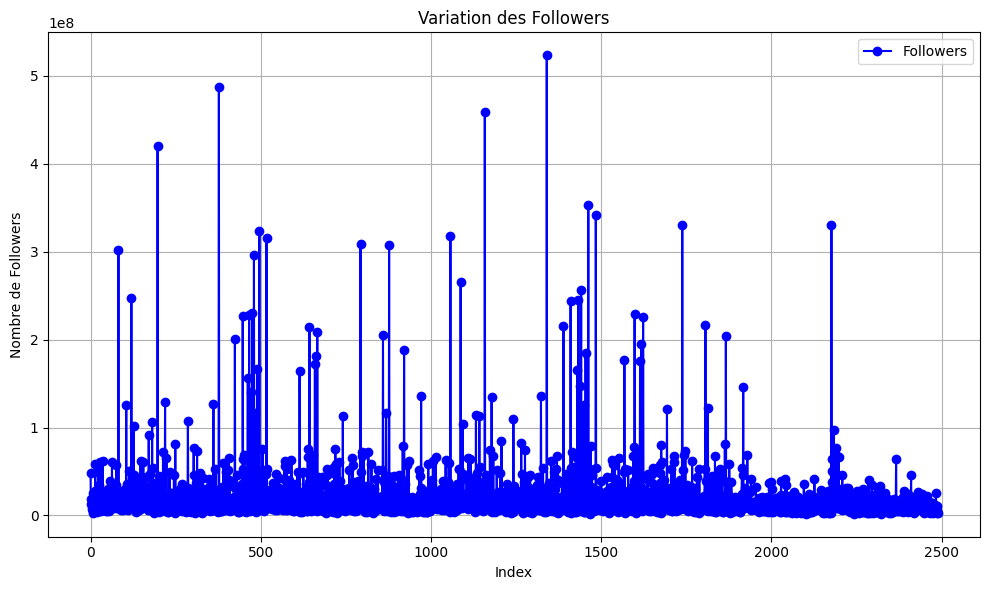

In [ ]:
import matplotlib.pyplot as plt

# Tracer la variation des followers sans variable temporelle
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Followers'], marker='o', color='b', label='Followers')
plt.title('Variation des Followers')
plt.xlabel('Index')
plt.ylabel('Nombre de Followers')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


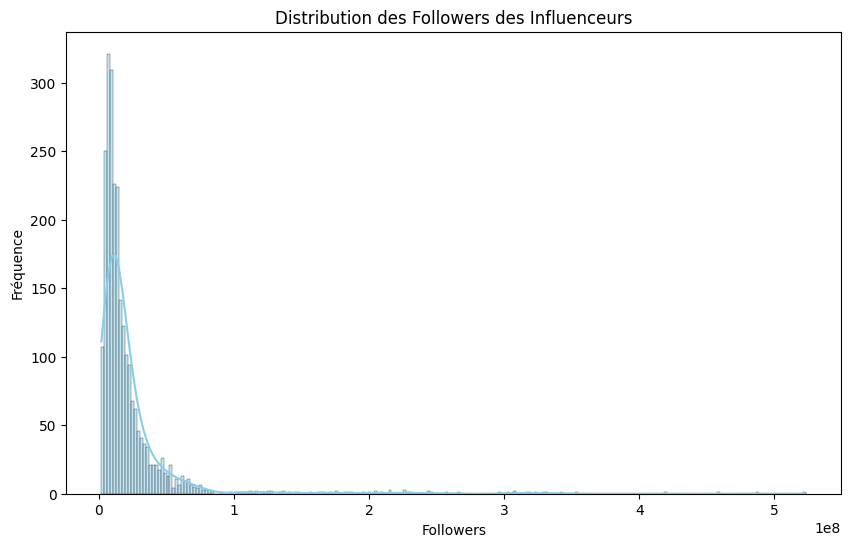

In [ ]:
# Visualisation de la distribution des Followers
plt.figure(figsize=(10, 6))
sns.histplot(df['Followers'], kde=True, color="skyblue")
plt.title('Distribution des Followers des Influenceurs')
plt.xlabel('Followers')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2487 entries, 0 to 2488
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influencer_name       2487 non-null   object 
 1   Instagram_name        2487 non-null   object 
 2   Category_1            2487 non-null   float64
 3   Category_2            2487 non-null   float64
 4   Followers             2487 non-null   float64
 5   Authentic_engagement  2487 non-null   float64
 6   Engagement_avg        2487 non-null   float64
 7   Comments avg.         2487 non-null   float64
 8   country               2487 non-null   float64
dtypes: float64(7), object(2)
memory usage: 194.3+ KB


In [ ]:
df.head()

,Influencer_name,Instagram_name,Category_1,Category_2,Followers,Authentic_engagement,Engagement_avg,Comments avg.,country
0,433,433,2.0,2.0,48500000.0,383100.0,637000.0,7.361110e+05,1.0
1,__youngbae__,TAEYANG,3.0,10.0,12700000.0,478000.0,542300.0,5.413467e+05,7.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,2.0,2.0,18800000.0,310800.0,377900.0,2.895620e+05,2.0
3,_imyour_joy,Joy,2.0,8.0,13500000.0,1100000.0,1400000.0,8.981593e+05,4.0
4,_jeongjaehyun,Jaehyun,1.0,14.0,11100000.0,2500000.0,3100000.0,1.440722e+06,5.0


In [ ]:
df = df.drop(columns=['Country'])

In [ ]:
df.head()

,Influencer_name,Instagram_name,Category_1,Category_2,Followers,Authentic_engagement,Engagement_avg,Comments avg.,country
0,433,433,Maison,Électroménager,48500000.0,383100.0,637K,7.361110e+05,Canada
1,__youngbae__,TAEYANG,Mode,Chaussures,12700000.0,478000.0,542.3K,5.413467e+05,Allemagne
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Électronique,Ordinateurs,18800000.0,310800.0,377.9K,2.895620e+05,Allemagne
3,_imyour_joy,Joy,Alimentation,Légumes,13500000.0,1100000.0,1.4M,8.981593e+05,Allemagne
4,_jeongjaehyun,Jaehyun,Alimentation,Légumes,11100000.0,2500000.0,3.1M,1.440722e+06,France


In [ ]:
df.describe()

,Followers,Authentic_engagement,Comments avg.
count,2.489000e+03,2.489000e+03,2.489000e+03
mean,2.278473e+07,5.911083e+05,7.791419e+05
std,3.786220e+07,1.012454e+06,8.638409e+05
min,1.900000e+06,0.000000e+00,3.860000e+04
25%,8.100000e+06,1.838000e+05,3.646000e+05
50%,1.320000e+07,3.367000e+05,5.896000e+05
75%,2.300000e+07,6.271000e+05,8.576000e+05
max,5.233000e+08,1.320000e+07,1.320000e+07


(3040, 10)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 0 to 5006
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.no           993 non-null    float64
 1   Tiktoker_name  3040 non-null   object 
 2   Tiktok_name    3039 non-null   object 
 3   Followers      3040 non-null   object 
 4   Views avg.     3040 non-null   object 
 5   Likes avg.     3040 non-null   object 
 6   Comments avg.  3040 non-null   object 
 7   Shares avg.    3040 non-null   object 
 8   Rank           573 non-null    float64
 9   row-cell       365 non-null    float64
dtypes: float64(3), object(7)
memory usage: 261.2+ KB


In [ ]:
dt = dt[dt['Tiktok_name'].notnull()]

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3039 entries, 0 to 5006
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.no           992 non-null    float64
 1   Tiktoker_name  3039 non-null   object 
 2   Tiktok_name    3039 non-null   object 
 3   Followers      3039 non-null   object 
 4   Views avg.     3039 non-null   object 
 5   Likes avg.     3039 non-null   object 
 6   Comments avg.  3039 non-null   object 
 7   Shares avg.    3039 non-null   object 
 8   Rank           573 non-null    float64
 9   row-cell       365 non-null    float64
dtypes: float64(3), object(7)
memory usage: 261.2+ KB


(1700, 11)

In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 0 to 5059
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.no              998 non-null    float64
 1   Channel_name      1700 non-null   object 
 2   Youtuber_name     1700 non-null   object 
 3   Audience_Country  1452 non-null   object 
 4   Followers         1700 non-null   object 
 5   Category_2        849 non-null    object 
 6   Avg. views        1700 non-null   object 
 7   Avg. likes        1693 non-null   object 
 8   Avg. comments     1675 non-null   object 
 9   Category_1        797 non-null    object 
 10  s.no              498 non-null    float64
dtypes: float64(2), object(9)
memory usage: 159.4+ KB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3039 entries, 0 to 5006
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tiktoker_name  3039 non-null   object
 1   Tiktok_name    3039 non-null   object
 2   Followers      3039 non-null   object
 3   Views avg.     3039 non-null   object
 4   Likes avg.     3039 non-null   object
 5   Comments avg.  3039 non-null   object
 6   Shares avg.    3039 non-null   object
dtypes: object(7)
memory usage: 189.9+ KB


In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 0 to 5059
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel_name      1700 non-null   object
 1   Youtuber_name     1700 non-null   object
 2   Audience_Country  1452 non-null   object
 3   Followers         1700 non-null   object
 4   Category_2        849 non-null    object
 5   Avg. views        1700 non-null   object
 6   Avg. likes        1693 non-null   object
 7   Avg. comments     1675 non-null   object
 8   Category_1        797 non-null    object
dtypes: object(9)
memory usage: 132.8+ KB


In [ ]:
# Vérifier le résultat
display(dt[['Followers']].head())

,Followers
0,13800000
1,149200000
2,2100000
3,88700000
4,4800000


In [ ]:
# Vérifier le résultat
display(dy[['Followers']].head())

,Followers
0,224400000
1,142500000
2,111600000
3,104100000
4,100500000


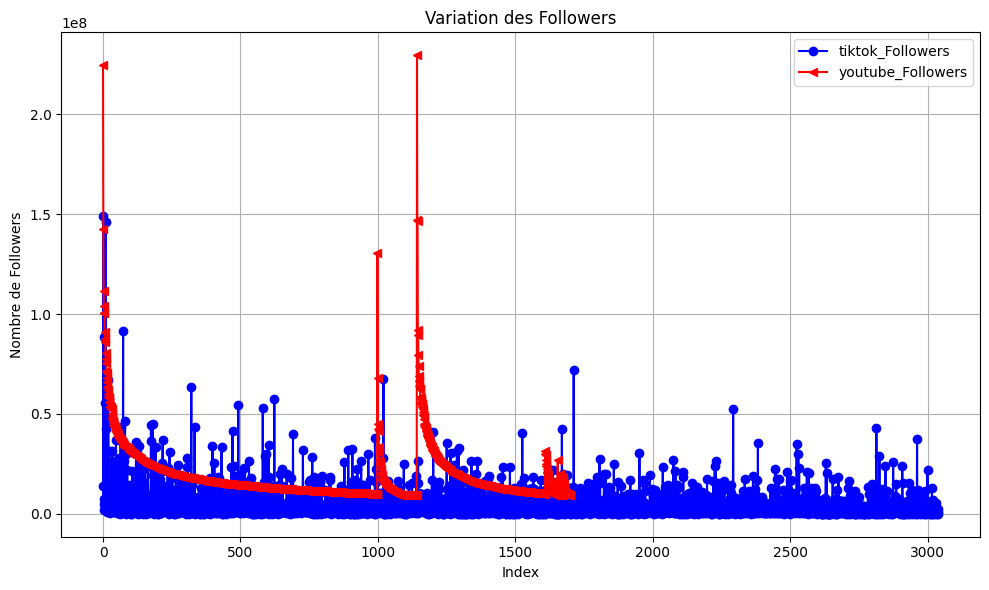

In [ ]:
import matplotlib.pyplot as plt

# Tracer la variation des followers sans variable temporelle
plt.figure(figsize=(10, 6))
plt.plot(dt.index, dt['Followers'], marker='o', color='b', label='tiktok_Followers')
plt.plot(dy.index, dy['Followers'], marker='<', color='r', label='youtube_Followers')
plt.title('Variation des Followers')
plt.xlabel('Index')
plt.ylabel('Nombre de Followers')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
dy.head()

NameError: name 'dy' is not defined

In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel_name      1700 non-null   object 
 1   Youtuber_name     1700 non-null   object 
 2   Audience_Country  1452 non-null   object 
 3   Followers         1700 non-null   int64  
 4   Category_2        849 non-null    object 
 5   Avg. views        1700 non-null   float64
 6   Avg. likes        1690 non-null   float64
 7   Avg. comments     1666 non-null   float64
 8   Category_1        797 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 119.7+ KB


In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel_name      1700 non-null   object 
 1   Youtuber_name     1700 non-null   object 
 2   Audience_Country  1700 non-null   object 
 3   Followers         1700 non-null   int64  
 4   Category_2        1700 non-null   object 
 5   Avg. views        1700 non-null   float64
 6   Avg. likes        1690 non-null   float64
 7   Avg. comments     1666 non-null   float64
 8   Category_1        1700 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 119.7+ KB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiktoker_name     3039 non-null   object 
 1   Tiktok_name       3039 non-null   object 
 2   Followers         3039 non-null   int64  
 3   Views avg.        3039 non-null   float64
 4   Likes avg.        3039 non-null   float64
 5   Comments avg.     3039 non-null   float64
 6   Shares avg.       3039 non-null   float64
 7   Audience_Country  3039 non-null   object 
 8   Category_1        3039 non-null   object 
 9   Category_2        3039 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 237.6+ KB


In [ ]:
dt.head()


,Tiktoker_name,Tiktok_name,Followers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Audience_Country,Category_1,Category_2
0,jypestraykids,Stray Kids,13800000,6400000.0,2300000.0,50200.0,34200.0,Inde,Maison,Meubles
1,khaby.lame,Khabane lame,149200000,17300000.0,2300000.0,15200.0,8700.0,Italie,Sport,Fitness
2,scarlettsspam2,scarlett,2100000,17900000.0,845800.0,53900.0,6300.0,Allemagne,Sport,Fitness
3,addisonre,Addison Rae,88700000,22000000.0,906600.0,7600.0,26200.0,Japon,Sport,Basketball
4,belindatok,Belinda,4800000,14200000.0,1500000.0,14500.0,15300.0,Inde,Électronique,Ordinateurs


In [ ]:
dy.head()

,Channel_name,Youtuber_name,Audience_Country,Followers,Category_2,Avg. views,Avg. likes,Avg. comments,Category_1
0,T-Series,tseries,7,224400000.0,10.0,141500.0,4600.0,125.0,2.0
1,Cocomelon - Nursery Rhymes,checkgate,5,142500000.0,5.0,12500000.0,64800.0,0.0,3.0
2,PewDiePie,PewDiePie,3,111600000.0,10.0,1900000.0,130500.0,7400.0,2.0
3,MrBeast,MrBeast6000,0,104100000.0,13.0,44800000.0,2200000.0,70900.0,2.0
4,✿ Kids Diana Show,✿ Kids Diana Show,4,100500000.0,3.0,6900000.0,34800.0,0.0,2.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Charger les données
data = dy.copy()  # Utilisez une copie des données pour éviter les SettingWithCopyWarning

# Sélection des features pertinentes
features = ["Followers","Category_2","Category_1","Avg. views"]
targets = ["Avg. likes", "Avg. comments"]

# Encoder les colonnes catégoriques
for col in ["Category_1", "Category_2", "Audience_Country"]:
    data[col] = data[col].astype(str)  # Convertir en chaîne pour gérer les NaN
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Remplacer les NaN dans les features numériques
imputer = SimpleImputer(strategy="median")
data[features] = imputer.fit_transform(data[features])

# Fonction pour entraîner et prédire les valeurs manquantes
def train_and_predict(target):
    # Vérifier s'il y a des valeurs non manquantes pour la cible
    if data[target].isna().all():
        print(f"La colonne '{target}' n'a aucune valeur non manquante. Elle sera ignorée.")
        return

    # Si aucune valeur manquante pour la cible, on passe directement
    if data[target].isna().sum() == 0:
        print(f"La colonne '{target}' n'a aucune valeur manquante. Aucun modèle n'est nécessaire.")
        return

    # Séparer les données en lignes avec et sans valeurs manquantes
    known_data = data.dropna(subset=[target])  # Lignes où la cible est connue
    unknown_data = data[data[target].isna()]   # Lignes où la cible est manquante

    # Log the size of known and unknown data
    print(f"Pour '{target}':")
    print(f" - Nombre de lignes avec des données connues : {len(known_data)}")
    print(f" - Nombre de lignes avec des données manquantes : {len(unknown_data)}")

    # Vérifier si les données connues sont suffisantes pour l'entraînement
    if known_data.empty:
        print(f"Aucune donnée disponible pour entraîner le modèle pour la colonne '{target}'.")
        return

    # Diviser les données connues en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(
        known_data[features], known_data[target], test_size=0.2, random_state=42
    )

    # Log the size of training and test data
    print(f" - Nombre d'échantillons dans l'ensemble d'entraînement pour '{target}': {len(X_train)}")
    print(f" - Nombre d'échantillons dans l'ensemble de test pour '{target}': {len(X_test)}")

    # Vérifier si l'ensemble d'entraînement a des échantillons
    if X_train.empty or y_train.empty:
        print(f"Aucun échantillon pour entraîner le modèle pour la colonne '{target}'.")
        return

    # Entraîner un modèle de RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prédire les valeurs manquantes
    predicted_values = model.predict(unknown_data[features])

    # Remplacer les valeurs manquantes dans le DataFrame original
    data.loc[data[target].isna(), target] = predicted_values

# Appliquer le modèle sur chaque colonne cible
for target in targets:
    train_and_predict(target)



Pour 'Avg. likes':
 - Nombre de lignes avec des données connues : 1690
 - Nombre de lignes avec des données manquantes : 10
 - Nombre d'échantillons dans l'ensemble d'entraînement pour 'Avg. likes': 1352
 - Nombre d'échantillons dans l'ensemble de test pour 'Avg. likes': 338
Pour 'Avg. comments':
 - Nombre de lignes avec des données connues : 1666
 - Nombre de lignes avec des données manquantes : 34
 - Nombre d'échantillons dans l'ensemble d'entraînement pour 'Avg. comments': 1332
 - Nombre d'échantillons dans l'ensemble de test pour 'Avg. comments': 334


In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel_name      1700 non-null   object 
 1   Youtuber_name     1700 non-null   object 
 2   Audience_Country  1700 non-null   object 
 3   Followers         1700 non-null   int64  
 4   Category_2        1700 non-null   object 
 5   Avg. views        1700 non-null   float64
 6   Avg. likes        1690 non-null   float64
 7   Avg. comments     1666 non-null   float64
 8   Category_1        1700 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 119.7+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel_name      1700 non-null   object 
 1   Youtuber_name     1700 non-null   object 
 2   Audience_Country  1700 non-null   int64  
 3   Followers         1700 non-null   float64
 4   Category_2        1700 non-null   float64
 5   Avg. views        1700 non-null   float64
 6   Avg. likes        1700 non-null   float64
 7   Avg. comments     1700 non-null   float64
 8   Category_1        1700 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 119.7+ KB


In [ ]:
dy[['Avg. comments', 'Avg. likes']] = data[['Avg. comments', 'Avg. likes']]

In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel_name      1700 non-null   object 
 1   Youtuber_name     1700 non-null   object 
 2   Audience_Country  1700 non-null   object 
 3   Followers         1700 non-null   int64  
 4   Category_2        1700 non-null   object 
 5   Avg. views        1700 non-null   float64
 6   Avg. likes        1700 non-null   float64
 7   Avg. comments     1700 non-null   float64
 8   Category_1        1700 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 119.7+ KB


In [ ]:
# Sauvegarder le fichier mis à jour
dy.to_csv("data_youtube_filled.csv", index=False)


In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel_name      1700 non-null   object 
 1   Youtuber_name     1700 non-null   object 
 2   Audience_Country  1700 non-null   object 
 3   Followers         1700 non-null   int64  
 4   Category_2        1700 non-null   object 
 5   Avg. views        1700 non-null   float64
 6   Avg. likes        1700 non-null   float64
 7   Avg. comments     1700 non-null   float64
 8   Category_1        1700 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 119.7+ KB


In [ ]:
dy_new=pd.read_csv("data_youtube_filled.csv")
dy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel_name      1700 non-null   object 
 1   Youtuber_name     1700 non-null   object 
 2   Audience_Country  1700 non-null   int64  
 3   Followers         1700 non-null   float64
 4   Category_2        1700 non-null   float64
 5   Avg. views        1700 non-null   float64
 6   Avg. likes        1700 non-null   float64
 7   Avg. comments     1700 non-null   float64
 8   Category_1        1700 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 119.7+ KB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiktoker_name     3039 non-null   object 
 1   Tiktok_name       3039 non-null   object 
 2   Followers         3039 non-null   int64  
 3   Views avg.        3039 non-null   float64
 4   Likes avg.        3039 non-null   float64
 5   Comments avg.     3039 non-null   float64
 6   Shares avg.       3039 non-null   float64
 7   Audience_Country  3039 non-null   object 
 8   Category_1        3039 non-null   object 
 9   Category_2        3039 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 237.6+ KB


In [ ]:
dt.to_csv("data_tiktok.csv", index=False)

#Visualisation des données

In [ ]:
# Test de corrélation de Pearson
correlation = df[['Followers', 'Engagement_avg']].corr()
print("Corrélation entre Followers et Engagement moyen:")
print(correlation)

Corrélation entre Followers et Engagement moyen:
                Followers  Engagement_avg
Followers        1.000000        0.259498
Engagement_avg   0.259498        1.000000


In [ ]:
# Test de corrélation de Pearson
correlation = df[['Followers', 'Comments avg.']].corr()
print("Corrélation entre Followers et Engagement moyen:")
print(correlation)

Corrélation entre Followers et Engagement moyen:
               Followers  Comments avg.
Followers       1.000000       0.336035
Comments avg.   0.336035       1.000000


In [ ]:
# Test de corrélation de Pearson
correlation = df[['Comments avg.', 'Authentic_engagement']].corr()
print("Corrélation entre Followers et Engagement moyen:")
print(correlation)

Corrélation entre Followers et Engagement moyen:
                      Comments avg.  Authentic_engagement
Comments avg.              1.000000              0.679745
Authentic_engagement       0.679745              1.000000


In [ ]:
# Test de corrélation de Pearson
correlation = df[['Engagement_avg', 'Comments avg.']].corr()
print("Corrélation entre Followers et Engagement moyen:")
print(correlation)

Corrélation entre Followers et Engagement moyen:
                Engagement_avg  Comments avg.
Engagement_avg        1.000000       0.457047
Comments avg.         0.457047       1.000000


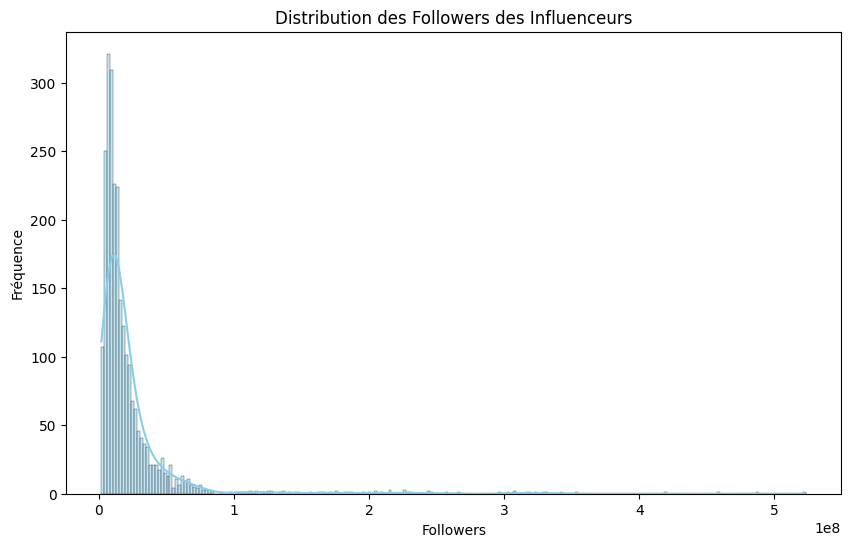

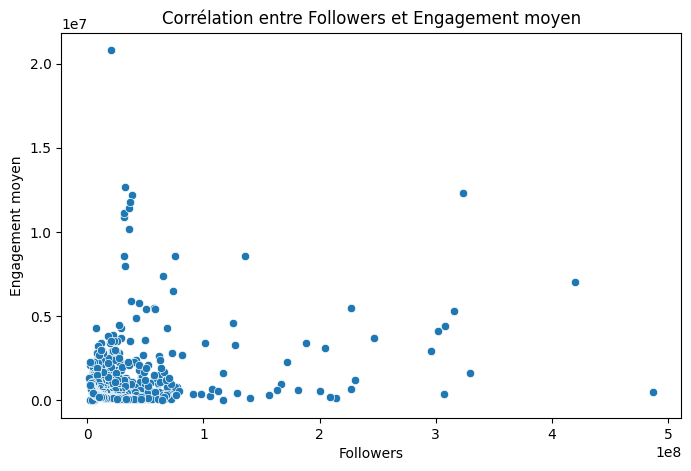

In [ ]:
# Visualisation de la distribution des Followers
plt.figure(figsize=(10, 6))
sns.histplot(df['Followers'], kde=True, color="skyblue")
plt.title('Distribution des Followers des Influenceurs')
plt.xlabel('Followers')
plt.ylabel('Fréquence')
plt.show()

# Corrélation entre Followers et Engagement_avg
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Followers', y='Engagement_avg', data=df)
plt.title('Corrélation entre Followers et Engagement moyen')
plt.xlabel('Followers')
plt.ylabel('Engagement moyen')
plt.show()

In [ ]:
#df.to_csv("data_insta.csv", index=False)  # index=False pour ne pas sauvegarder l'index


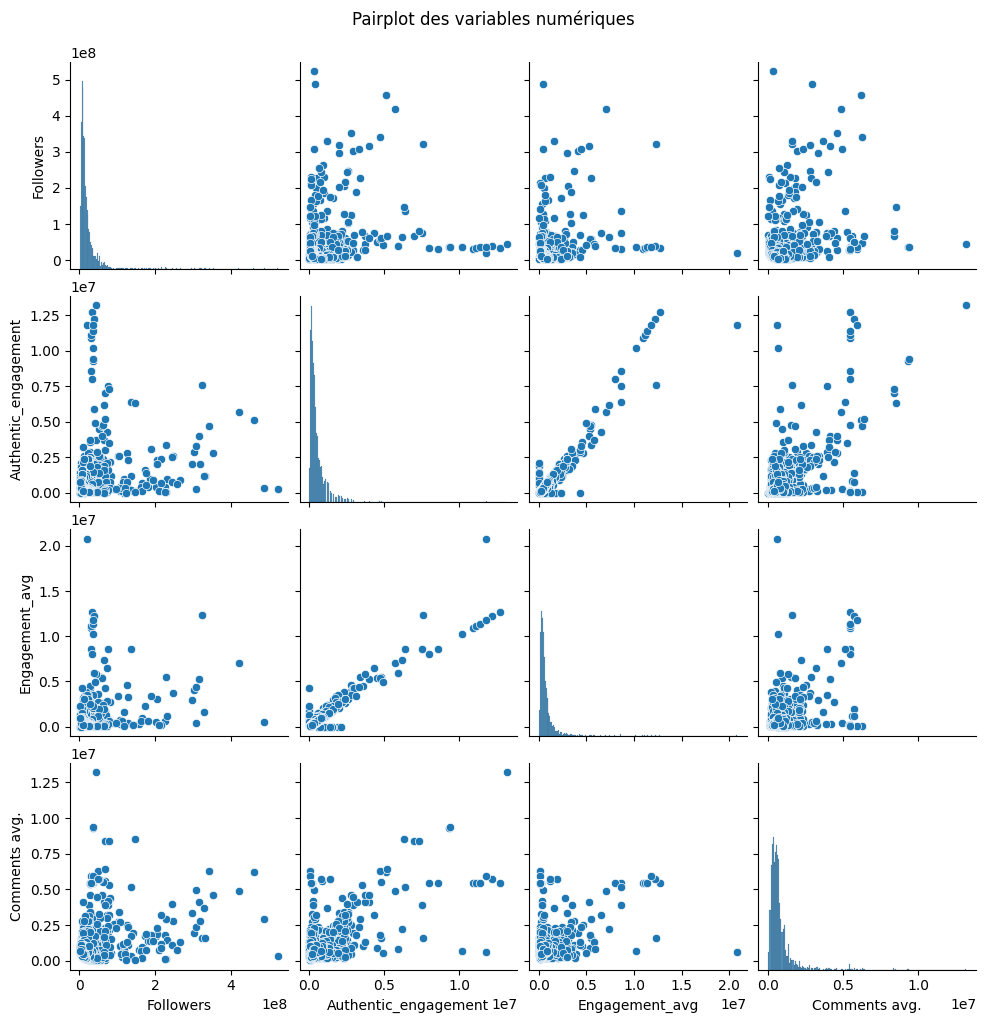

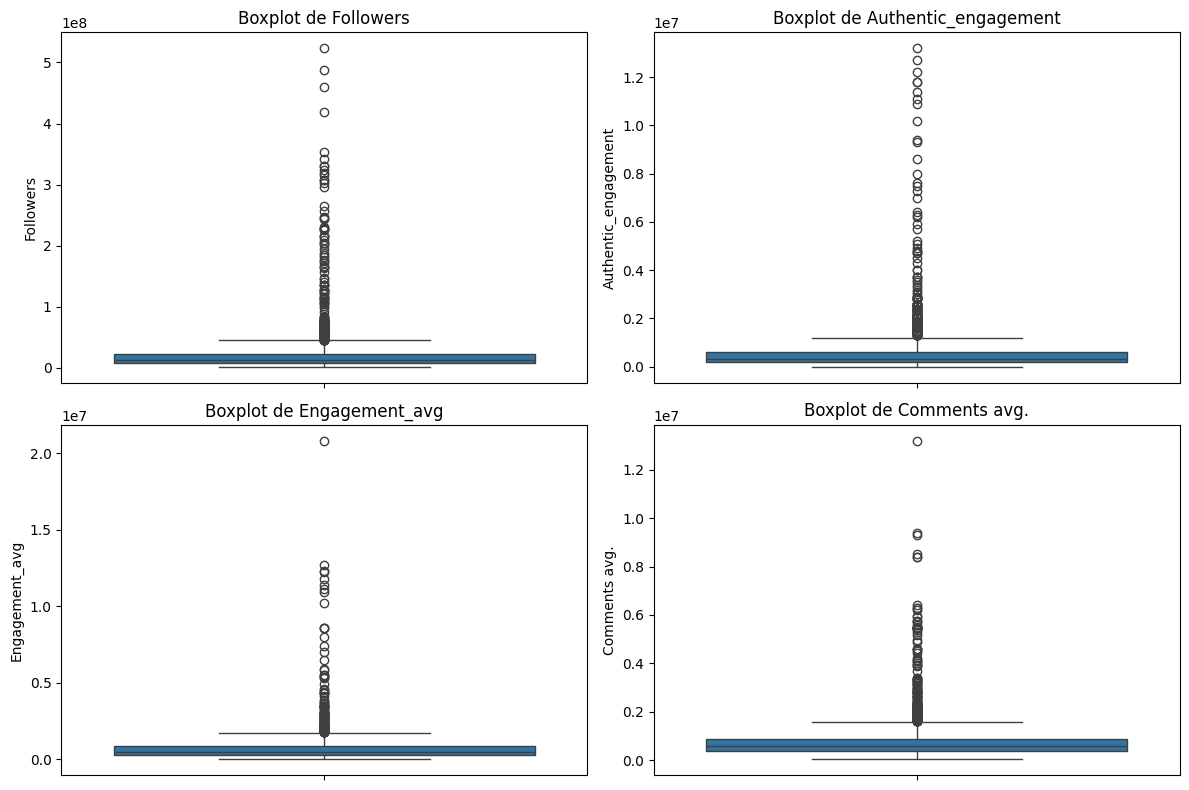

In [ ]:
# Sélectionner uniquement les colonnes numériques
numerical_columns = ["Followers", "Authentic_engagement", "Engagement_avg", "Comments avg."]

# ----- PAIRPLOT -----
sns.pairplot(df[numerical_columns])
plt.suptitle("Pairplot des variables numériques", y=1.02)
plt.show()

# ----- BOXPLOTS -----
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

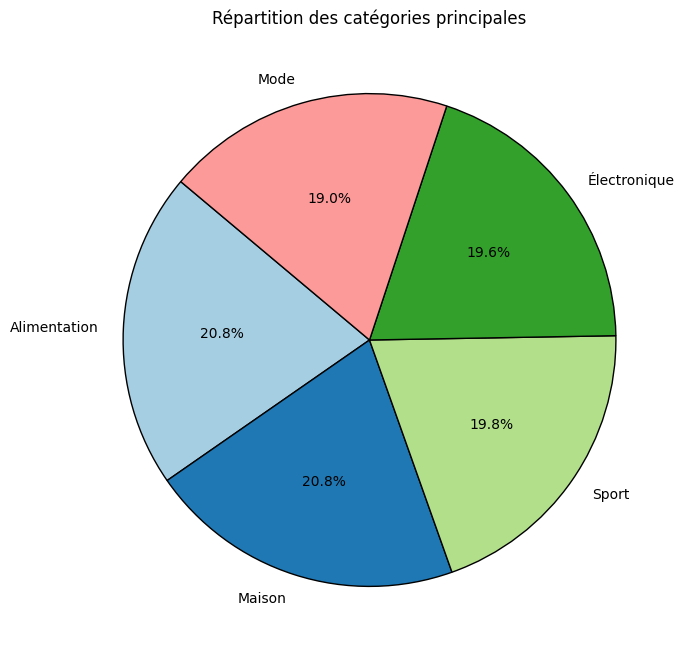

In [ ]:
# Compter les occurrences de chaque catégorie
category_counts = df["Category_1"].value_counts()

# Créer un pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

plt.title("Répartition des catégories principales")
plt.show()

In [ ]:
import plotly.express as px

# Créer un graphique Sunburst
fig = px.sunburst(df, path=["Category_1", "Category_2"], values="Followers",
                  color="Category_1", title="Répartition des catégories et sous-catégories")

fig.show()


<ipython-input-57-66c4020c5c31>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




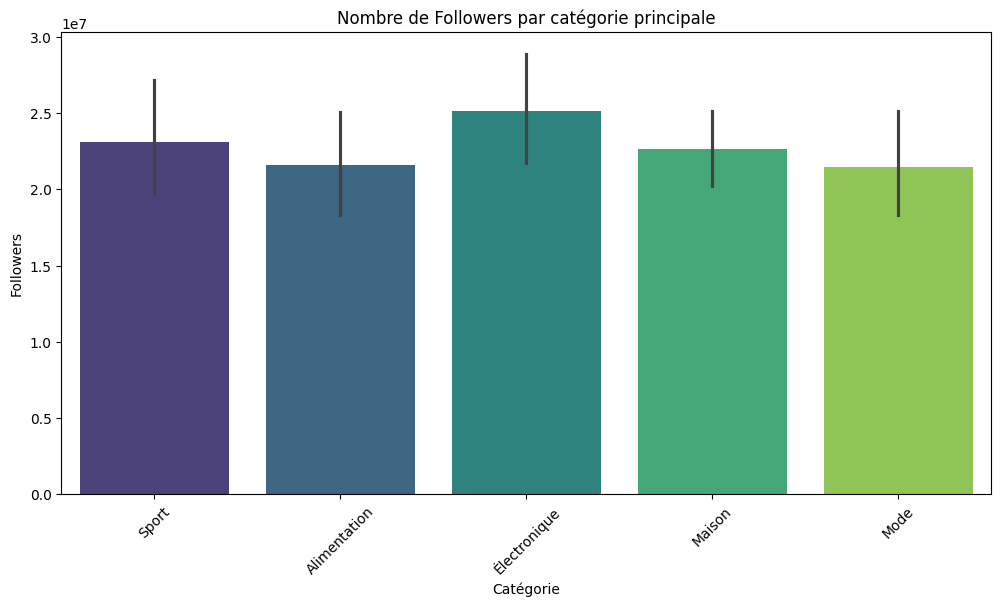

In [ ]:
# Créer un barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="Category_1", y="Followers", data=df, palette="viridis")

plt.xticks(rotation=45)
plt.title("Nombre de Followers par catégorie principale")
plt.ylabel("Followers")
plt.xlabel("Catégorie")
plt.show()

<ipython-input-58-3bf9f20c8e21>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




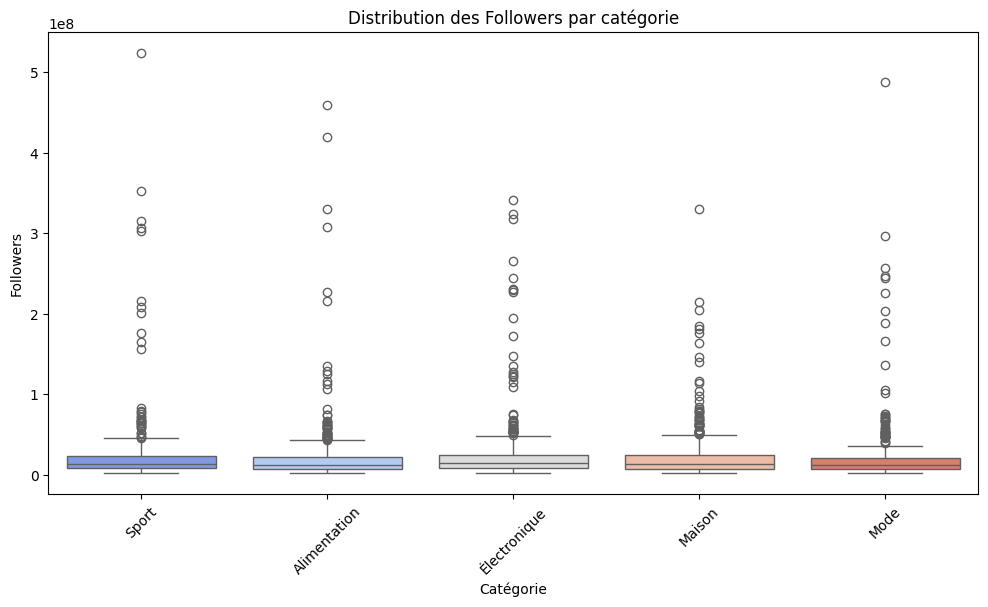

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category_1", y="Followers", data=df, palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Distribution des Followers par catégorie")
plt.ylabel("Followers")
plt.xlabel("Catégorie")
plt.show()

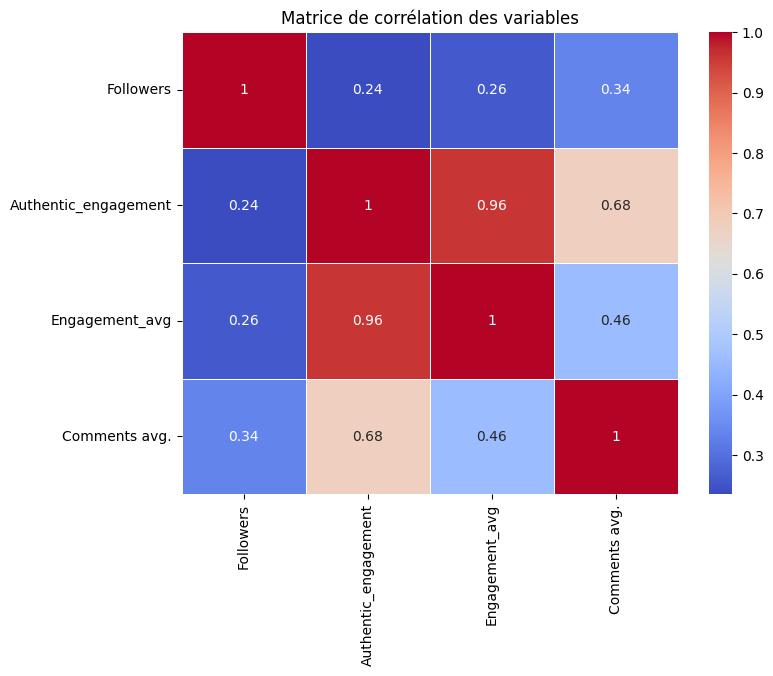

In [ ]:
import numpy as np

# Calculer la matrice de corrélation
correlation_matrix = df[["Followers", "Authentic_engagement", "Engagement_avg", "Comments avg."]].corr()

# Créer la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Matrice de corrélation des variables")
plt.show()


<ipython-input-61-b435a3800a43>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.1

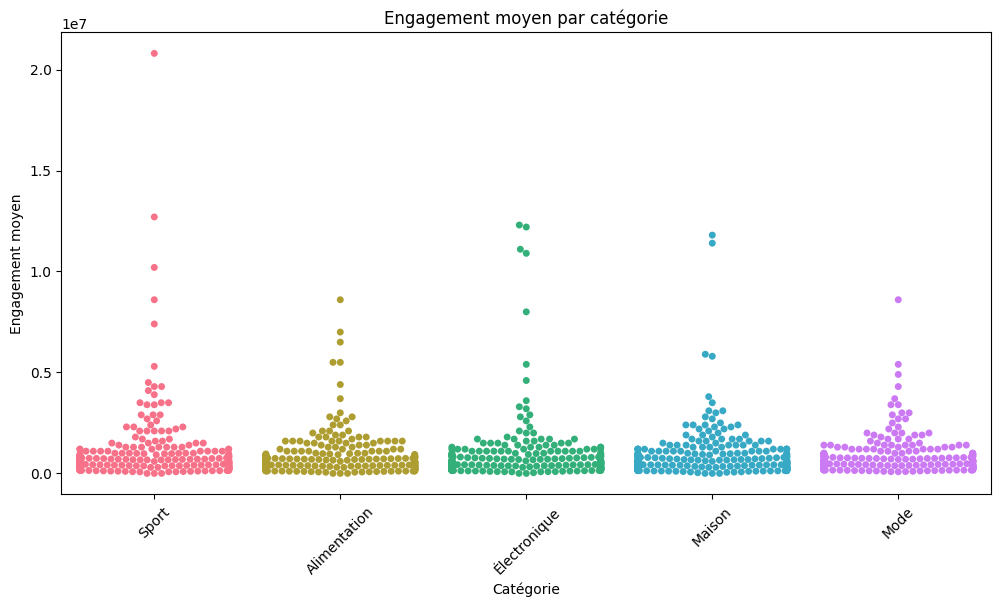

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Category_1", y="Engagement_avg", data=df, palette="husl")

plt.xticks(rotation=45)
plt.title("Engagement moyen par catégorie")
plt.ylabel("Engagement moyen")
plt.xlabel("Catégorie")
plt.show()


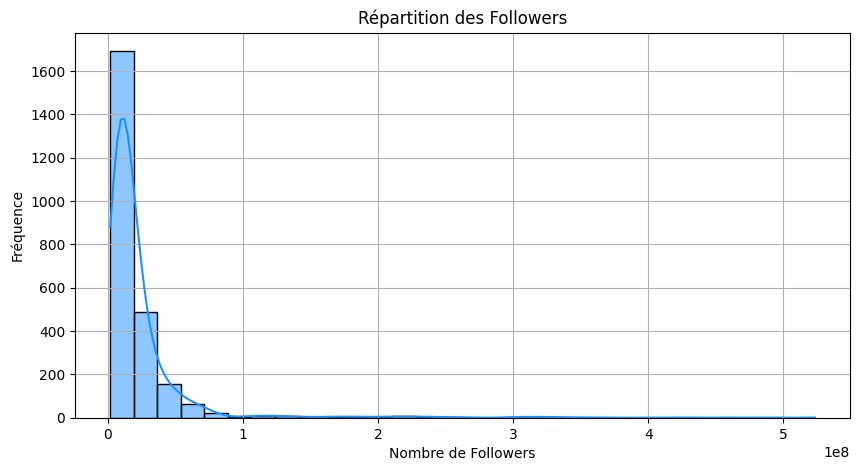

In [ ]:
# Histogramme des followers
plt.figure(figsize=(10, 5))
sns.histplot(df["Followers"], bins=30, kde=True, color="dodgerblue")

plt.title("Répartition des Followers")
plt.xlabel("Nombre de Followers")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

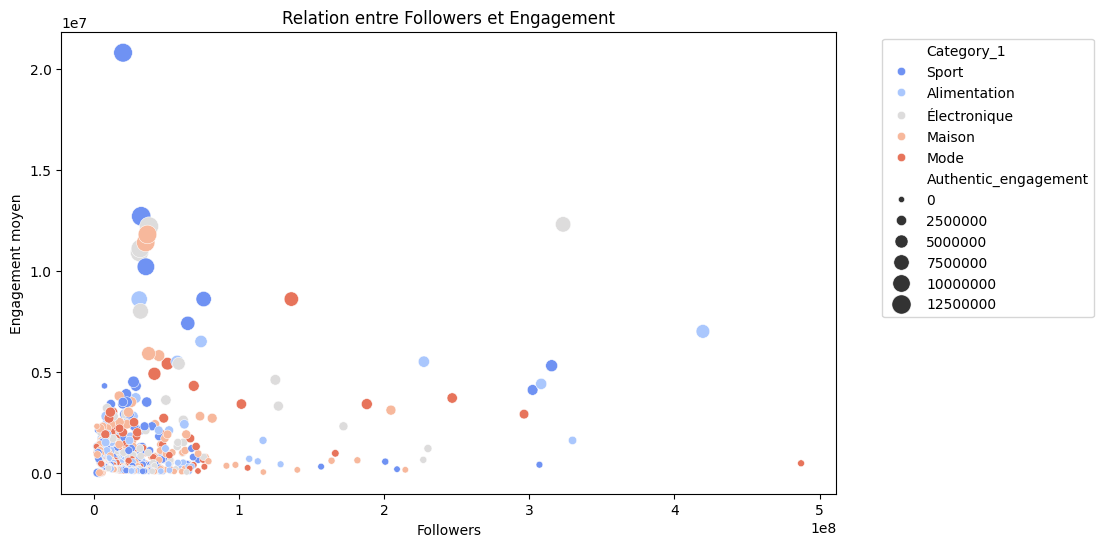

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Followers", y="Engagement_avg", hue="Category_1", size="Authentic_engagement", data=df, palette="coolwarm", sizes=(20, 200))

plt.title("Relation entre Followers et Engagement")
plt.xlabel("Followers")
plt.ylabel("Engagement moyen")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


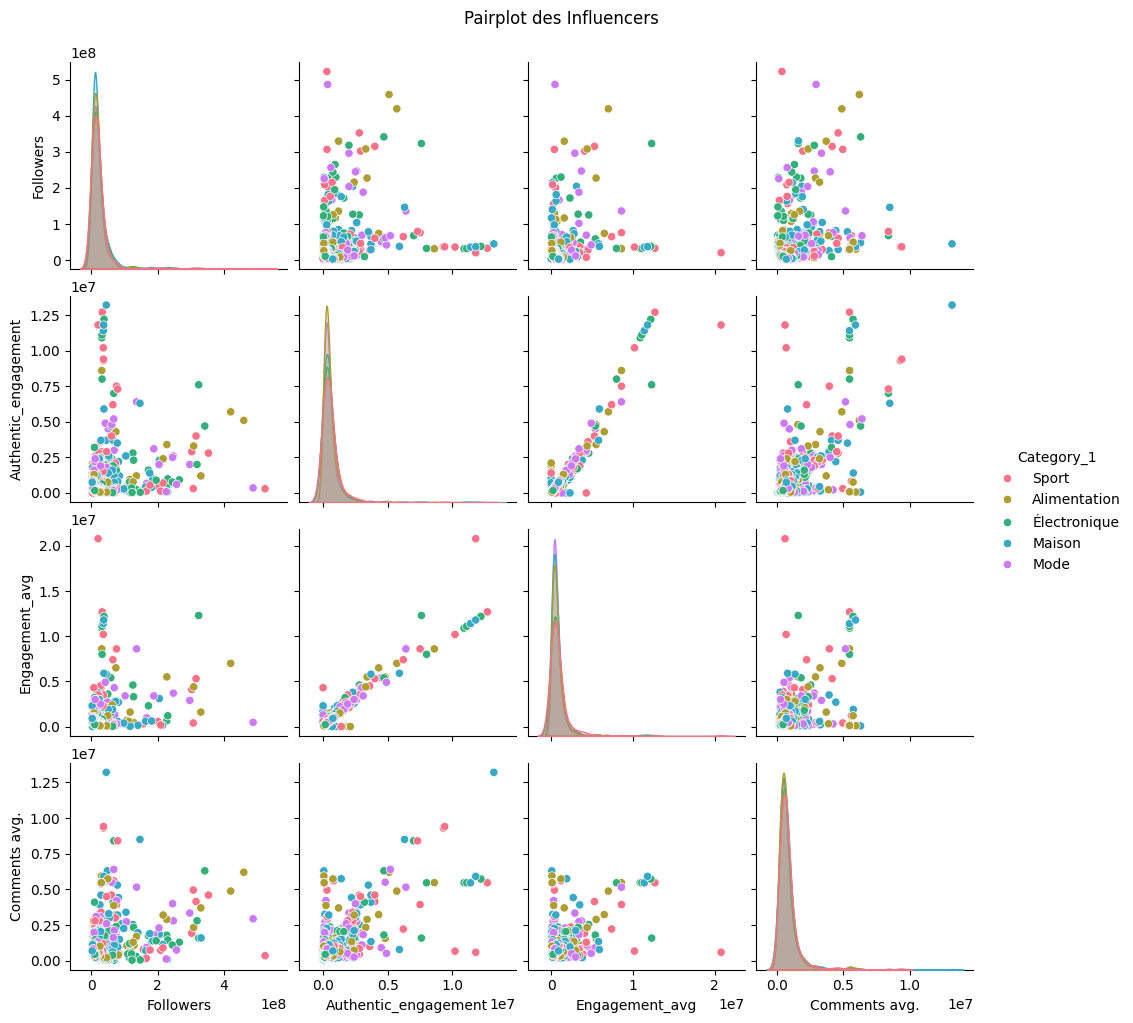

In [ ]:
sns.pairplot(df, vars=["Followers", "Authentic_engagement", "Engagement_avg", "Comments avg."], hue="Category_1", palette="husl")

plt.suptitle("Pairplot des Influencers", y=1.02)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



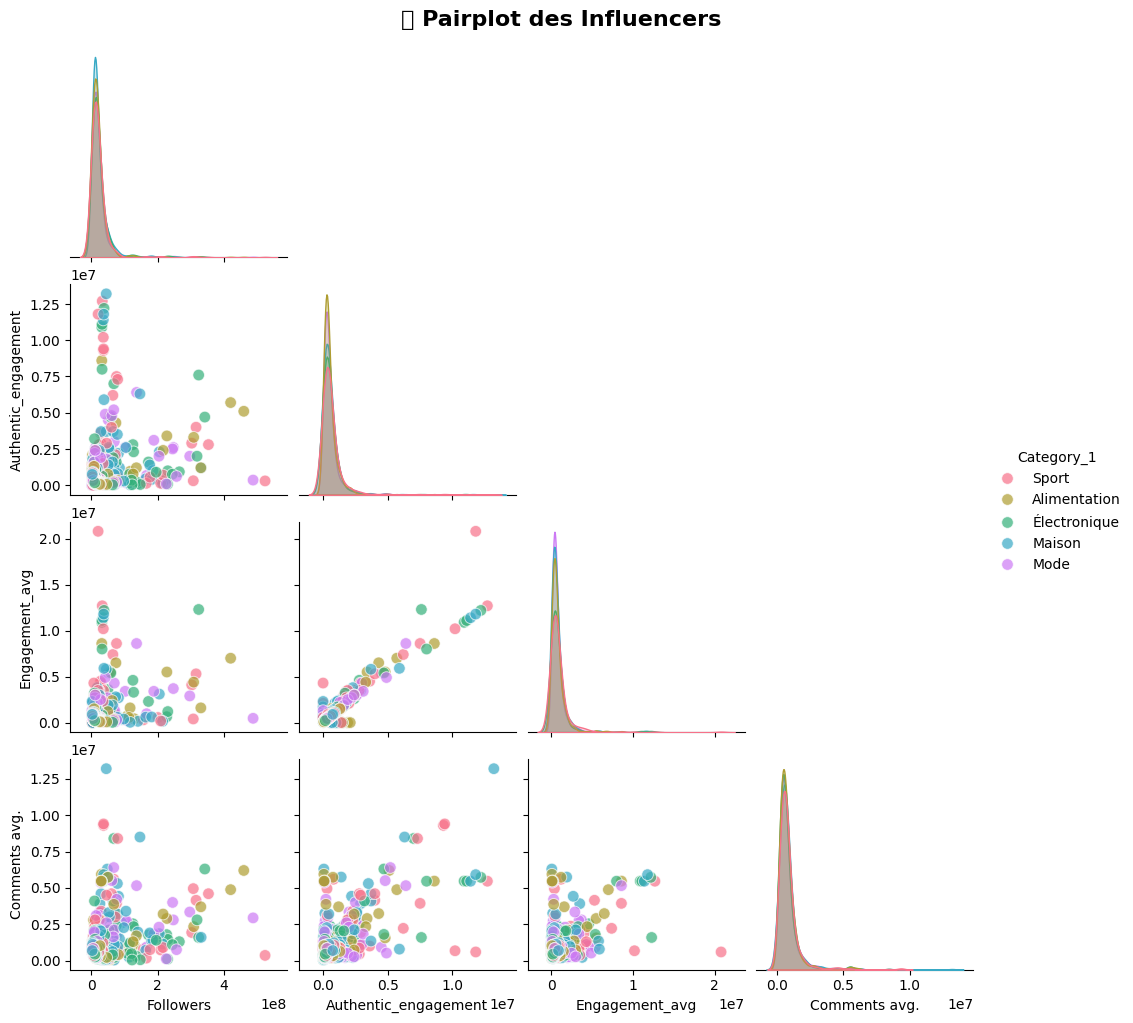

In [ ]:
sns.pairplot(df, vars=["Followers", "Authentic_engagement", "Engagement_avg", "Comments avg."],
             hue="Category_1", palette="husl", corner=True, plot_kws={"alpha":0.7, "s":70})

plt.suptitle("🔍 Pairplot des Influencers", y=1.02, fontsize=16, fontweight="bold")
plt.show()


In [ ]:
df["Engagement_Rate"] = df["Engagement_avg"] / df["Followers"]
top_engagement = df.sort_values(by="Engagement_Rate", ascending=False).head(5)

print("📊 Top 5 influenceurs avec le meilleur taux d'engagement:")
print(top_engagement[["Instagram_name", "Followers", "Engagement_avg", "Engagement_Rate"]])


📊 Top 5 influenceurs avec le meilleur taux d'engagement:
             Instagram_name   Followers  Engagement_avg  Engagement_Rate
2243           leejen_o_423   2200000.0       2300000.0         1.045455
945           MAKE OUT HILL  20200000.0      20800000.0         1.029703
328                 HAECHAN   2700000.0       2100000.0         0.777778
2323               kh1000le   1900000.0       1300000.0         0.684211
2100  RAMPAGE THE DANCER 🇨🇺   2200000.0       1300000.0         0.590909


In [ ]:
df["Authentic_Engagement_Rate"] = df["Authentic_engagement"] / df["Followers"]
top_authentic = df.sort_values(by="Authentic_Engagement_Rate", ascending=False).head(5)

print("💎 Top 5 influenceurs avec le meilleur engagement authentique:")
print(top_authentic[["Instagram_name", "Followers", "Authentic_engagement", "Authentic_Engagement_Rate"]])


💎 Top 5 influenceurs avec le meilleur engagement authentique:
     Instagram_name   Followers  Authentic_engagement  \
1288  haechanahceah   3500000.0             2100000.0   
945   MAKE OUT HILL  20200000.0            11800000.0   
1787  sugaringcandy   2500000.0             1400000.0   
1522     m.by__sana   2800000.0             1500000.0   
986         _zyozyo   3600000.0             1900000.0   

      Authentic_Engagement_Rate  
1288                   0.600000  
945                    0.584158  
1787                   0.560000  
1522                   0.535714  
986                    0.527778  


In [ ]:
df["Comments_Rate"] = df["Comments avg."] / df["Followers"]
top_comments = df.sort_values(by="Comments_Rate", ascending=False).head(5)

print("💬 Top 5 influenceurs avec le meilleur taux de commentaires:")
print(top_comments[["Instagram_name", "Followers", "Comments avg.", "Comments_Rate"]])


💬 Top 5 influenceurs avec le meilleur taux de commentaires:
             Instagram_name  Followers  Comments avg.  Comments_Rate
2323               kh1000le  1900000.0       967298.5       0.509104
2243           leejen_o_423  2200000.0       967298.5       0.439681
2100  RAMPAGE THE DANCER 🇨🇺  2200000.0       967298.5       0.439681
1899                yawnzzn  9400000.0      4100000.0       0.436170
1468         lalala_lfamily  2200000.0       959400.0       0.436091


In [ ]:
df["Influence_Score"] = (df["Engagement_Rate"] * 0.4) + (df["Authentic_Engagement_Rate"] * 0.4) + (df["Comments_Rate"] * 0.2)
top_influencers = df.sort_values(by="Influence_Score", ascending=False).head(5)

print("🏆 Top 5 influenceurs les plus efficaces globalement:")
print(top_influencers[["Instagram_name", "Followers", "Influence_Score"]])


🏆 Top 5 influenceurs les plus efficaces globalement:
             Instagram_name   Followers  Influence_Score
945           MAKE OUT HILL  20200000.0         0.651412
2100  RAMPAGE THE DANCER 🇨🇺   2200000.0         0.524300
2243           leejen_o_423   2200000.0         0.506118
1962               LEE JENO   4300000.0         0.405660
328                 HAECHAN   2700000.0         0.384505


<ipython-input-76-a5014e4857f8>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.



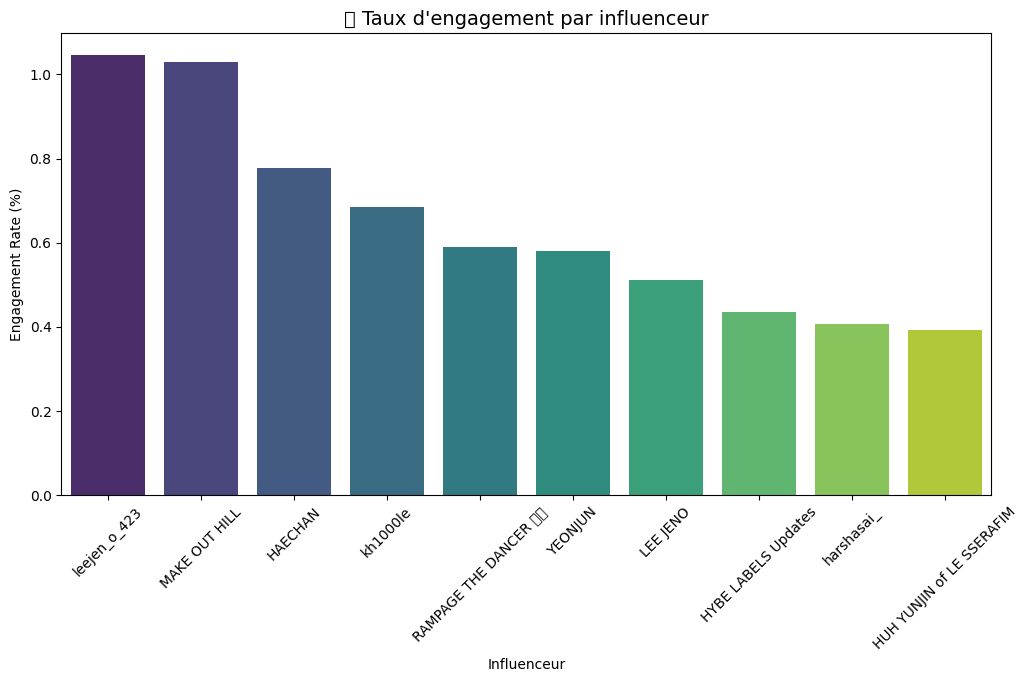

In [ ]:
# Trier les 10 meilleurs influenceurs en engagement
top_engagement = df.sort_values(by="Engagement_Rate", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_engagement, x="Instagram_name", y="Engagement_Rate", palette="viridis")
plt.xticks(rotation=45)
plt.title("🔝 Taux d'engagement par influenceur", fontsize=14)
plt.ylabel("Engagement Rate (%)")
plt.xlabel("Influenceur")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



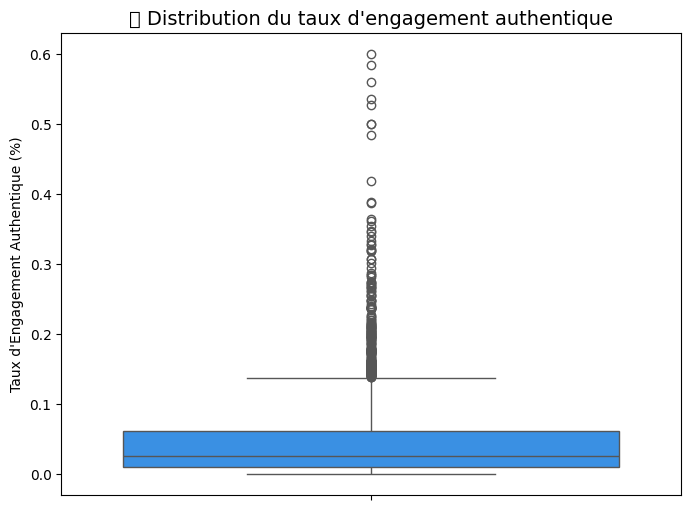

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y="Authentic_Engagement_Rate", color="dodgerblue")
plt.title("📈 Distribution du taux d'engagement authentique", fontsize=14)
plt.ylabel("Taux d'Engagement Authentique (%)")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



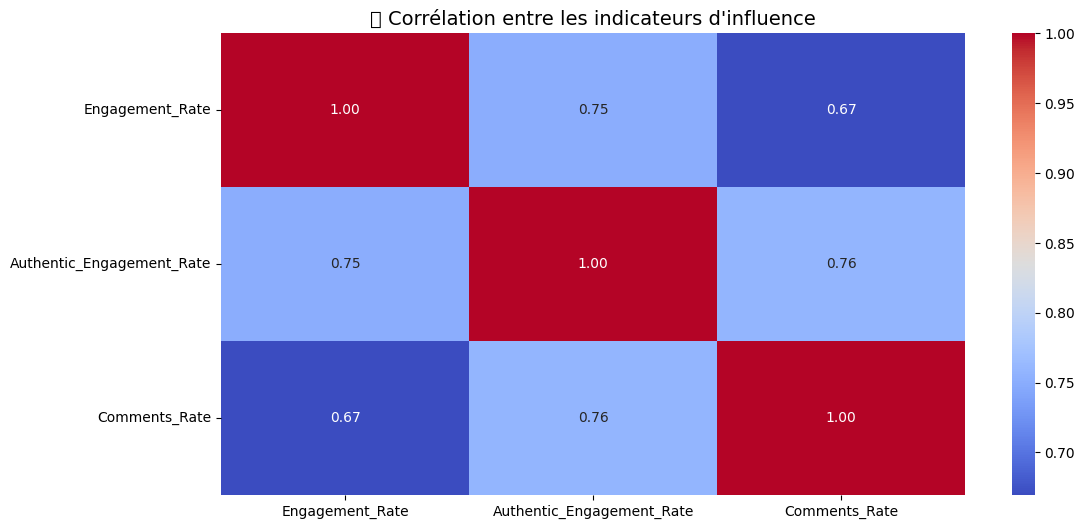

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df[["Engagement_Rate", "Authentic_Engagement_Rate", "Comments_Rate"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔥 Corrélation entre les indicateurs d'influence", fontsize=14)
plt.show()


1️⃣ Méthode basée sur les Followers
Une estimation courante est :
📌 Prix Story ≈ (Followers / 1000) × Taux d'Engagement × Facteur de prix

Exemple d’implémentation :

In [ ]:
df["Story_Price"] = (df["Followers"] / 1000) * (df["Engagement_avg"] / df["Followers"]) * 10  # Facteur ajustable

In [ ]:
df.head()

,Influencer_name,Instagram_name,Category_1,Category_2,Followers,Authentic_engagement,Engagement_avg,Comments avg.,country,Engagement_Rate,Authentic_Engagement_Rate,Comments_Rate,Influence_Score,Story_Price
0,433,433,Sport,Fitness,48500000.0,383100.0,637000.0,7.361110e+05,Australie,0.013134,0.007899,0.015178,0.011449,6370.0
1,__youngbae__,TAEYANG,Alimentation,Boissons,12700000.0,478000.0,542300.0,5.413467e+05,Japon,0.042701,0.037638,0.042626,0.040661,5423.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Alimentation,Fruits,18800000.0,310800.0,377900.0,2.895620e+05,Inde,0.020101,0.016532,0.015402,0.017734,3779.0
3,_imyour_joy,Joy,Électronique,Ordinateurs,13500000.0,1100000.0,1400000.0,8.981593e+05,Brésil,0.103704,0.081481,0.066530,0.087380,14000.0
4,_jeongjaehyun,Jaehyun,Maison,Décoration,11100000.0,2500000.0,3100000.0,1.440722e+06,Brésil,0.279279,0.225225,0.129795,0.227761,31000.0


🏆 Meilleur Influenceur Global:
Instagram_name     MAKE OUT HILL
Influence_Score         0.651412
country                  Espagne
Name: 945, dtype: object
🔥 Influenceur le Plus Efficace:
Instagram_name       _zyozyo
Influence_Score      0.25334
country            Allemagne
Name: 986, dtype: object
📌 Top 5 Influenceurs les Plus Efficaces avec le Plus Faible Coût:
     Instagram_name  Influence_Score  Story_Price  country
1787  sugaringcandy         0.301384          0.0  Espagne
1522     m.by__sana         0.285118          0.0    Japon
1412       jy_piece         0.280608          0.0      USA
1288  haechanahceah         0.278855          0.0  Espagne
1571     mina_sr_my         0.260667          0.0    Japon


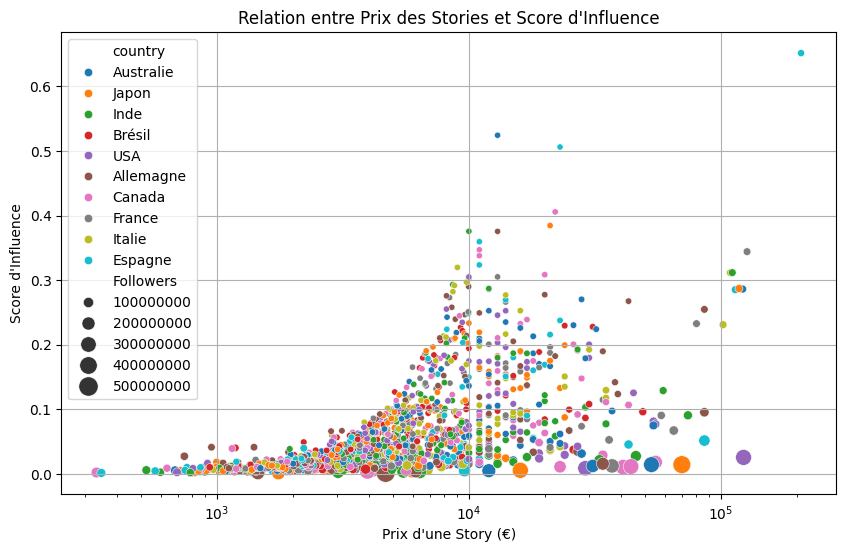

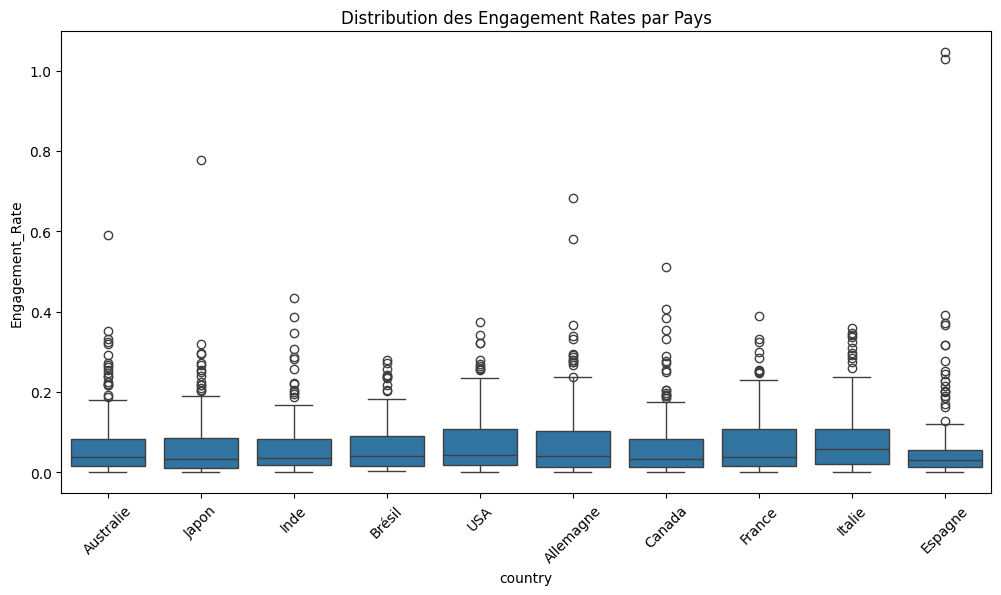

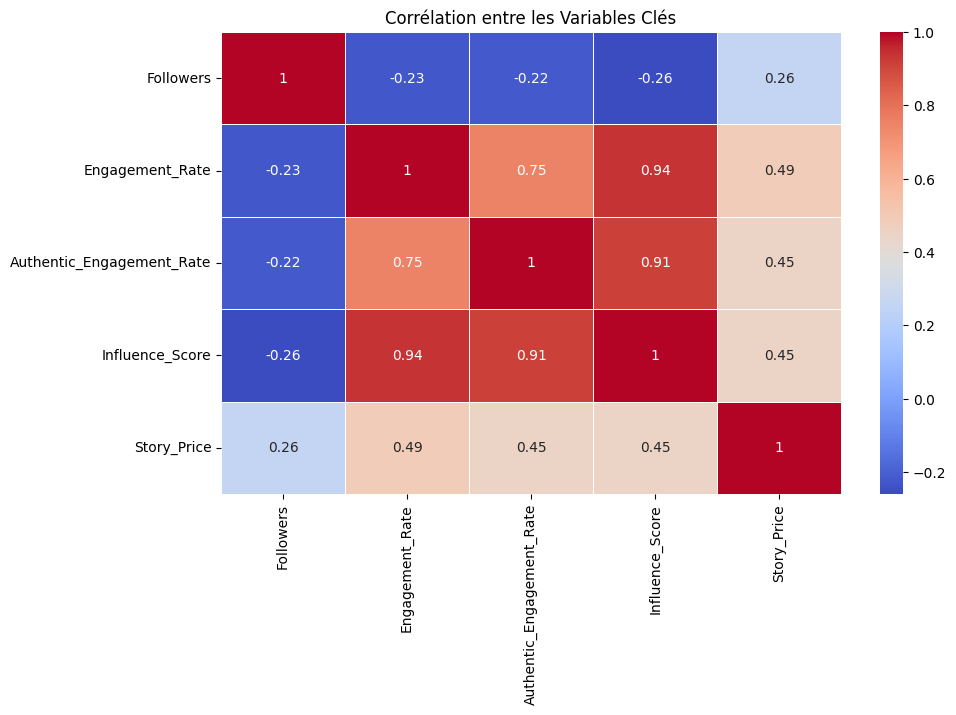

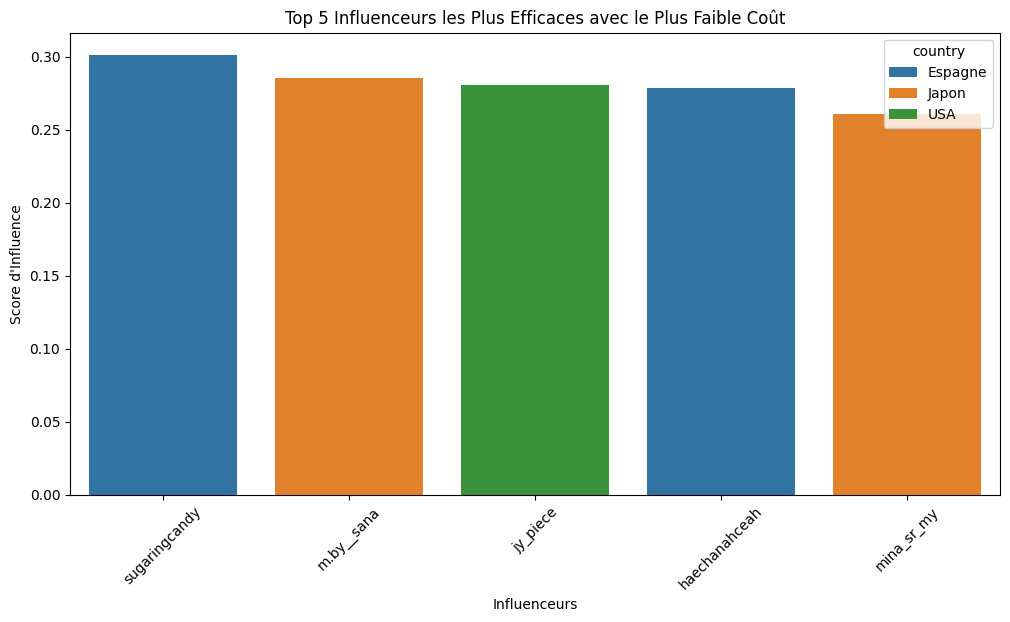

In [ ]:
# Définir les meilleurs influenceurs
best_influencer = df.loc[df["Influence_Score"].idxmax()]
best_efficient = (df["Influence_Score"] / df["Story_Price"]).idxmax()
best_efficient = df.loc[best_efficient]

# Sélection des Top 5 influenceurs les plus efficaces avec le coût le plus faible
top_5_efficient = df.sort_values(by=["Influence_Score"], ascending=False).nsmallest(5, "Story_Price")

print("🏆 Meilleur Influenceur Global:")
print(best_influencer[["Instagram_name", "Influence_Score", "country"]])

print("🔥 Influenceur le Plus Efficace:")
print(best_efficient[["Instagram_name", "Influence_Score", "country"]])

print("📌 Top 5 Influenceurs les Plus Efficaces avec le Plus Faible Coût:")
print(top_5_efficient[["Instagram_name", "Influence_Score", "Story_Price", "country"]])

# Visualisation : Score d'Influence vs Prix des Stories
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Story_Price", y="Influence_Score", hue="country", size="Followers", sizes=(20, 200))
plt.title("Relation entre Prix des Stories et Score d'Influence")
plt.xlabel("Prix d'une Story (€)")
plt.ylabel("Score d'Influence")
plt.xscale("log")  # Pour mieux voir la distribution
plt.grid(True)
plt.show()

# Boxplot des Engagement Rates par pays
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="country", y="Engagement_Rate")
plt.xticks(rotation=45)
plt.title("Distribution des Engagement Rates par Pays")
plt.show()

# Heatmap des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Followers", "Engagement_Rate", "Authentic_Engagement_Rate", "Influence_Score", "Story_Price"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Corrélation entre les Variables Clés")
plt.show()

# Barplot des Top 5 Influenceurs les Plus Efficaces avec le Plus Faible Coût
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_efficient, x="Instagram_name", y="Influence_Score", hue="country", dodge=False)
plt.xticks(rotation=45)
plt.title("Top 5 Influenceurs les Plus Efficaces avec le Plus Faible Coût")
plt.xlabel("Influenceurs")
plt.ylabel("Score d'Influence")
plt.show()


In [ ]:
# Sélection des Top 5 influenceurs les plus efficaces avec le coût le plus faible
top_5_efficient = df.sort_values(by=["Influence_Score"], ascending=False).nsmallest(5, "Story_Price")

print("🏆 Meilleur Influenceur Global:")
print(best_influencer[["Instagram_name", "Influence_Score", "country"]])

print("🔥 Influenceur le Plus Efficace:")
print(best_efficient[["Instagram_name", "Influence_Score", "country"]])

print("📌 Top 5 Influenceurs les Plus Efficaces avec le Plus Faible Coût:")
print(top_5_efficient[["Instagram_name", "Influence_Score", "Story_Price", "country"]])

🏆 Meilleur Influenceur Global:
Instagram_name     MAKE OUT HILL
Influence_Score         0.651412
country                  Espagne
Name: 945, dtype: object
🔥 Influenceur le Plus Efficace:
Instagram_name       _zyozyo
Influence_Score      0.25334
country            Allemagne
Name: 986, dtype: object
📌 Top 5 Influenceurs les Plus Efficaces avec le Plus Faible Coût:
     Instagram_name  Influence_Score  Story_Price  country
1787  sugaringcandy         0.301384          0.0  Espagne
1522     m.by__sana         0.285118          0.0    Japon
1412       jy_piece         0.280608          0.0      USA
1288  haechanahceah         0.278855          0.0  Espagne
1571     mina_sr_my         0.260667          0.0    Japon
